Loading Data

In [3]:
# Loading Data
import pandas as pd
import numpy as np
import nltk

df = pd.read_excel("C:/Users/Mirtha/Downloads/Source Code Skripsi/User Story and User Story Scenario_Revisi 2 - Copy.xlsx")
df = df.fillna('')
df


,Project Name,Nama Fitur,User Story,Scenario,Scenario.1,Scenario.2,Scenario.3,Scenario.4,Scenario.5,Scenario.6,Scenario.7,Scenario.8,Scenario.9,Scenario.10,Effort
0,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
1,Akobesi,Logout,"In order to secure my session\nAs Admin,\nI wa...",Scenario: Log out Successfully \nGiven I am on...,,,,,,,,,,,S
2,Akobesi,Reset Password,In order to log in to the system in case I for...,Scenario: Password Reset Successfully\nGiven I...,Scenario: Password Reset Failed due to a misma...,,,,,,,,,,M
3,Akobesi,Change Password,"In order to secure my account\nAs Lecturer,\nI...",Scenario: Password Change Successfully\nGiven ...,Scenario: Password Change Failed due to a mism...,Scenario: Password Change Failed due to incorr...,,,,,,,,,S
4,Akobesi,Create Program Outcomes,In order to establish Program Outcomes\nAs Cur...,Scenario: Create Program Outcomes Successfully...,Scenario: Create Program Outcomes Failed as th...,Scenario: Create Program Outcomes Failed Due t...,,,,,,,,,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,User Story Generator,Update user story,"In order to improve user story\nAs User,\nI wa...",Scenario: Update user story successfully\nGive...,Scenario: Update user story failed due to empt...,,,,,,,,,,S
166,User Story Generator,Create user story scenario,In order to generate detailed user story \nAs ...,Scenario: Create user story scenario successfu...,Scenario: Create user story scenario failed du...,,,,,,,,,,XXL
167,User Story Generator,Update user story scenario,In order to improve detailed user story \nAs U...,Scenario: Update user story scenario successfu...,Scenario: Update user story scenario failed du...,,,,,,,,,,S
168,User Story Generator,Read user story History,In order to review the relevant user story\nAs...,Scenario: Read user story History Successfully...,Scenario: Read user story history failed due t...,,,,,,,,,,S


In [4]:
# Fungsi untuk menggandakan data berdasarkan nilai di kolom 'Effort'
def duplicate_data(row):
    if row['Effort'] == 'M':
        return pd.DataFrame([row] * int(4620/55), columns=row.index)
    elif row['Effort'] == 'L':
        return pd.DataFrame([row] * int(4620/12), columns=row.index)
    elif row['Effort'] == 'S':
        return pd.DataFrame([row] * int(4620/84), columns=row.index)
    elif row['Effort'] == 'XL':
        return pd.DataFrame([row] * int(4620/7), columns=row.index)
    elif row['Effort'] == 'XXL':
        return pd.DataFrame([row] * int(4620/12), columns=row.index)

# Membuat DataFrame baru dengan data yang digandakan
df = pd.concat(df.apply(duplicate_data, axis=1).tolist(), ignore_index=True)

# Menampilkan DataFrame baru
df

,Project Name,Nama Fitur,User Story,Scenario,Scenario.1,Scenario.2,Scenario.3,Scenario.4,Scenario.5,Scenario.6,Scenario.7,Scenario.8,Scenario.9,Scenario.10,Effort
0,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
1,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
2,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
3,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
4,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23095,User Story Generator,Delete user story History,In order to remove irrelevant user story\nAs C...,Scenario: Delete user story History Successful...,,,,,,,,,,,XL
23096,User Story Generator,Delete user story History,In order to remove irrelevant user story\nAs C...,Scenario: Delete user story History Successful...,,,,,,,,,,,XL
23097,User Story Generator,Delete user story History,In order to remove irrelevant user story\nAs C...,Scenario: Delete user story History Successful...,,,,,,,,,,,XL
23098,User Story Generator,Delete user story History,In order to remove irrelevant user story\nAs C...,Scenario: Delete user story History Successful...,,,,,,,,,,,XL


In [ ]:
df.to_excel("output.xlsx", index=False)

Menggabungkan Data

In [5]:
# Menggabungkan Data Setiap Kolom
df['combined'] = df.iloc[:, 1:13].apply(lambda x: '\n'.join(x), axis=1)

# Menampilkan hasil gabungan setiap kolom
print(df.loc[0, 'combined'])

Login
In order to access curriculum data
As Admin,
I want to log in to the system
Scenario: Login Successfully as Admin 
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “32525252523”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/admin”
And the “Lecturer Name” field should contain “Admin”
Scenario: Login Successfully as Curriculum Team Member
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “197801262006041001”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/curriculum”
And the “Lecturer Name” field should contain “Badrus Zaman, S.Kom., M.Cs.”	
Scenario: Login Successfully as Lecturer 
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “198110282006041003”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/lecturer”
A

Numeric Feature Extraction

In [6]:
# Numeric Feature Extraction
import re

def count_when_then_pair(text):
    # Mencari kemunculan "when" dan "then" secara terpisah
    matches_when = re.findall(r'\bwhen\b', text)
    matches_then = re.findall(r'\bthen\b', text)
    
    # Menghitung jumlah pasangan "when" dan "then"
    count_pair = min(len(matches_when), len(matches_then))
    
    return count_pair

# Menghitung jumlah token dan skenario
df['combined'] = df['combined'].str.lower()
df['number_word'] = df['combined'].apply(lambda x: len(x.split()))
df['number_scenario'] = df['combined'].apply(lambda x: x.count("scenario:"))
df['number_of_step'] = df['combined'].apply(count_when_then_pair)
df['number_of_S1'] = df['combined'].apply(lambda x: x.count("i am on"))
df['number_of_S2'] = df['combined'].apply(lambda x: x.count("i press"))
df['number_of_S3'] = df['combined'].apply(lambda x: x.count("i follow"))
df['number_of_F1'] = df['combined'].apply(lambda x: x.count("i fill in "))
df['number_of_F2'] = df['combined'].apply(lambda x: x.count("i select"))
df['number_of_F3'] = df['combined'].apply(lambda x: x.count("i check"))
df['number_of_F4'] = df['combined'].apply(lambda x: x.count("i uncheck"))
df['number_of_F5'] = df['combined'].apply(lambda x: x.count("i attach"))
df['number_of_A1'] = df['combined'].apply(lambda x: x.count("i should see"))
df['number_of_A2'] = df['combined'].apply(lambda x: x.count("the response should contain"))
df['number_of_A3'] = df['combined'].apply(lambda x: x.count("field should contain"))
df['number_of_A4'] = df['combined'].apply(lambda x: x.count("checkbox should be checked"))
df['number_of_A5'] = df['combined'].apply(lambda x: x.count("checkbox should not be checked"))
df['number_of_A6'] = df['combined'].apply(lambda x: x.count("i should be on"))
df['number_of_A7'] = df['combined'].apply(lambda x: x.count("the url should match"))

print(df[['number_word', 'number_scenario', 'number_of_step', 'number_of_S1', 'number_of_S2', 'number_of_S3', 'number_of_F1', 'number_of_F2', 'number_of_F3', 'number_of_F4', 'number_of_F5', 'number_of_A1', 'number_of_A2', 'number_of_A3', 'number_of_A4', 'number_of_A5', 'number_of_A6', 'number_of_A7']])

       number_word  number_scenario  number_of_step  number_of_S1  \
0              193                4               4             4   
1              193                4               4             4   
2              193                4               4             4   
3              193                4               4             4   
4              193                4               4             4   
...            ...              ...             ...           ...   
23095           71                1               2             1   
23096           71                1               2             1   
23097           71                1               2             1   
23098           71                1               2             1   
23099           71                1               2             1   

       number_of_S2  number_of_S3  number_of_F1  number_of_F2  number_of_F3  \
0                 4             0             8             0             0   
1            

In [7]:
# Normalisasi
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# print("Hasil normalisasi")
# df[['number_word', 'number_scenario']] = scaler.fit_transform(df[['number_word', 'number_scenario']])
# df[['number_word', 'number_scenario']]

In [8]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Transform 'Effort' column
effort_encoded = encoder.fit_transform(df[['Effort']])

# Convert the encoded effort to a dense array
effort_dense_array = effort_encoded.toarray()

# Display the encoded result
print("Encoded 'Effort' categories:")
for label, encoded_label in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
    print(f"{label}: {encoded_label}")

# Display the dense array
print("Dense array representation of encoded 'Effort' categories:")
print(effort_dense_array)

Encoded 'Effort' categories:
L: 0
M: 1
S: 2
XL: 3
XXL: 4
Dense array representation of encoded 'Effort' categories:
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


Class distribution:
L: 0.20
M: 0.20
S: 0.20
XL: 0.20
XXL: 0.20
Total count of each class:
L: 4620.0
M: 4620.0
S: 4620.0
XL: 4620.0
XXL: 4620.0


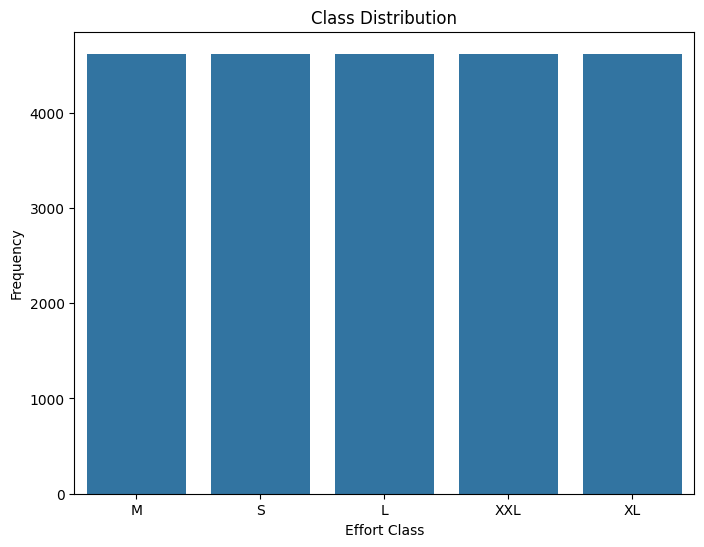

In [9]:
# Distribusi Kelas
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate class distribution
class_distribution = np.sum(effort_dense_array, axis=0) / len(effort_dense_array)

# Display class distribution
print("Class distribution:")
for label, distribution in zip(encoder.categories_[0], class_distribution):
    print(f"{label}: {distribution:.2f}")
# Calculate total count of each class
class_totals = np.sum(effort_dense_array, axis=0)

# Display total count of each class
print("Total count of each class:")
for label, total in zip(encoder.categories_[0], class_totals):
    print(f"{label}: {total}")

# Hitung total dari setiap kelas dalam target variabel (Effort)
class_distribution = df['Effort'].value_counts()

# Visualisasikan distribusi kelas menggunakan plot bar
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Effort Class')
plt.ylabel('Frequency')
plt.show()

Model (Numerik) <== All Features

====================Adaboost====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00      3850
           M       0.00      0.00      0.00      3864
           S       0.07      0.33      0.11       990
          XL       0.00      0.00      0.00      1320
         XXL       0.41      0.33      0.37      1155

   micro avg       0.12      0.06      0.08     11179
   macro avg       0.10      0.13      0.10     11179
weighted avg       0.05      0.06      0.05     11179
 samples avg       0.06      0.06      0.06     11179



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Precision: 0.04824832128879144     Recall: 0.06395920923159495      Accuracy: 0.06395920923159495      F1 Score: 0.047763090290544534

Confusion matrix for test project 'Akobesi':


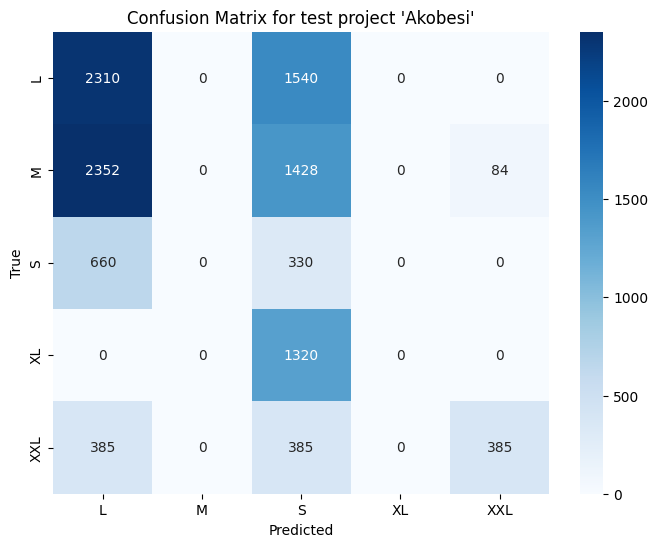

====================Decision Tree====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00      3850
           M       0.00      0.00      0.00      3864
           S       0.04      0.22      0.07       990
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00      1155

   micro avg       0.03      0.02      0.02     11179
   macro avg       0.01      0.04      0.01     11179
weighted avg       0.00      0.02      0.01     11179
 samples avg       0.02      0.02      0.02     11179



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Precision: 0.0037677352774662842     Recall: 0.019679756686644602      Accuracy: 0.019679756686644602      F1 Score: 0.006324609355552071

Confusion matrix for test project 'Akobesi':


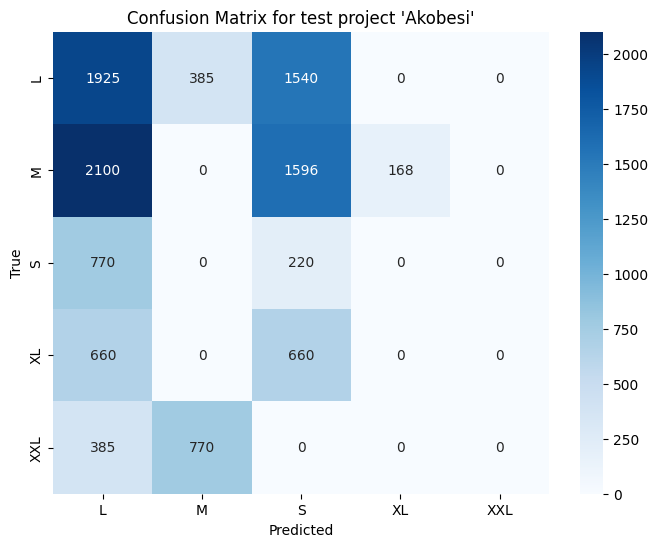

====================Multinomial Naive Bayes====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00      3850
           M       0.10      0.04      0.06      3864
           S       0.03      0.17      0.06       990
          XL       0.00      0.00      0.00      1320
         XXL       0.14      0.67      0.23      1155

   micro avg       0.07      0.10      0.08     11179
   macro avg       0.05      0.18      0.07     11179
weighted avg       0.05      0.10      0.05     11179
 samples avg       0.09      0.10      0.09     11179



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.05127730660024241     Recall: 0.09866714375167725      Accuracy: 0.08363896591823955      F1 Score: 0.04948329726156359

Confusion matrix for test project 'Akobesi':


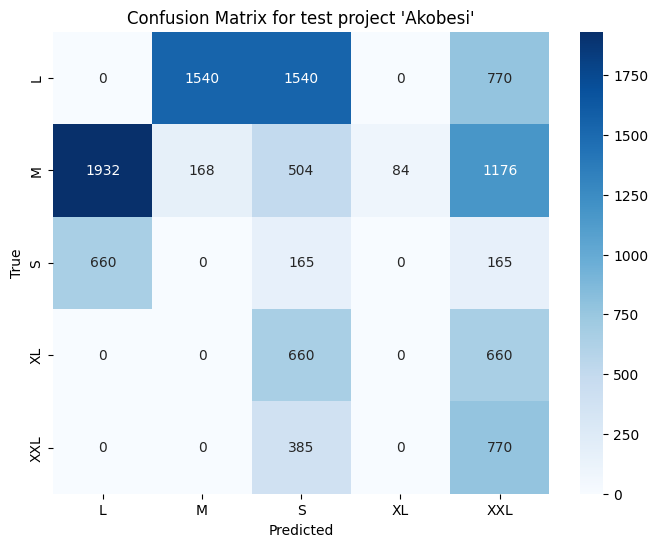

====================Adaboost====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       1.00      0.67      0.80       330
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.61      0.28      0.38       799
   macro avg       0.20      0.13      0.16       799
weighted avg       0.41      0.28      0.33       799
 samples avg       0.28      0.28      0.28       799

Precision: 0.4130162703379224     Recall: 0.2753441802252816      Accuracy: 0.2753441802252816      F1 Score: 0.3304130162703379

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

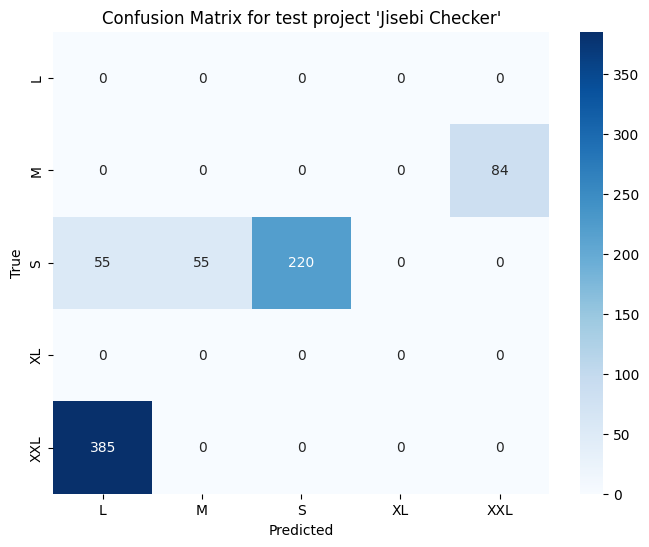

====================Decision Tree====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.60      1.00      0.75        84
           S       1.00      0.83      0.91       330
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.87      0.45      0.59       799
   macro avg       0.32      0.37      0.33       799
weighted avg       0.48      0.45      0.45       799
 samples avg       0.45      0.45      0.45       799

Precision: 0.4765489235645276     Recall: 0.4493116395494368      Accuracy: 0.4493116395494368      F1 Score: 0.45467147836140465

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

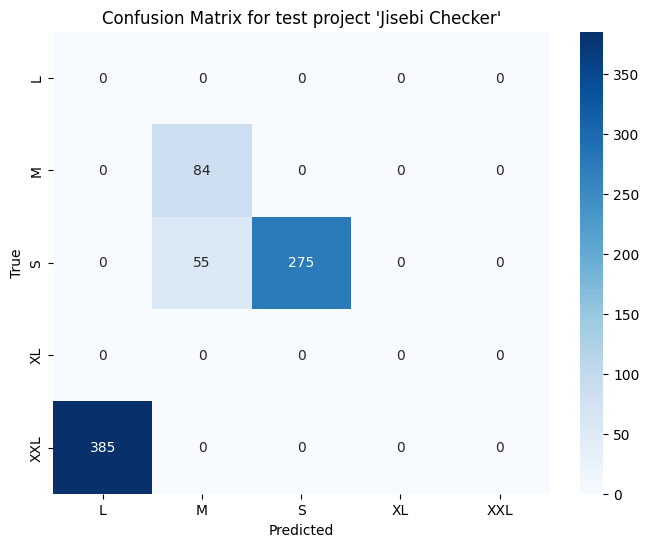

====================Multinomial Naive Bayes====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       1.00      0.83      0.91       330
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.29      0.34      0.31       799
   macro avg       0.20      0.17      0.18       799
weighted avg       0.41      0.34      0.38       799
 samples avg       0.21      0.34      0.25       799

Precision: 0.4130162703379224     Recall: 0.344180225281602      Accuracy: 0.0688360450563204      F1 Score: 0.37546933667083854

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

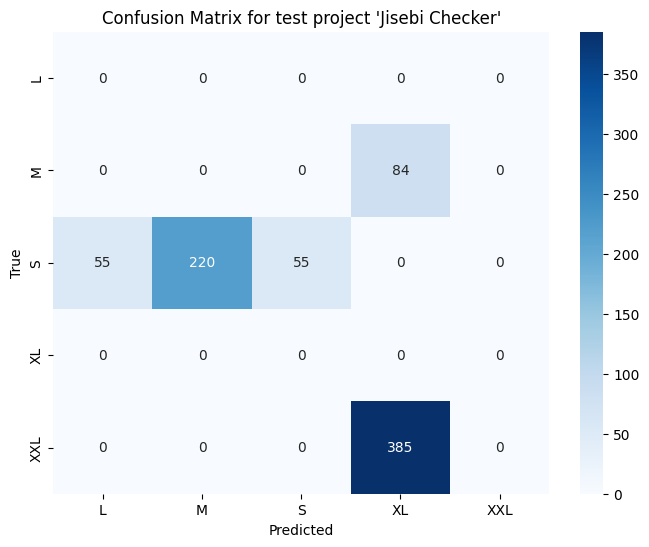

====================Adaboost====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.56      0.71       495
          XL       0.00      0.00      0.00         0
         XXL       1.00      1.00      1.00       385

   micro avg       0.92      0.75      0.83       880
   macro avg       0.40      0.31      0.34       880
weighted avg       1.00      0.75      0.84       880
 samples avg       0.75      0.75      0.75       880

Precision: 1.0     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.8392857142857143

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

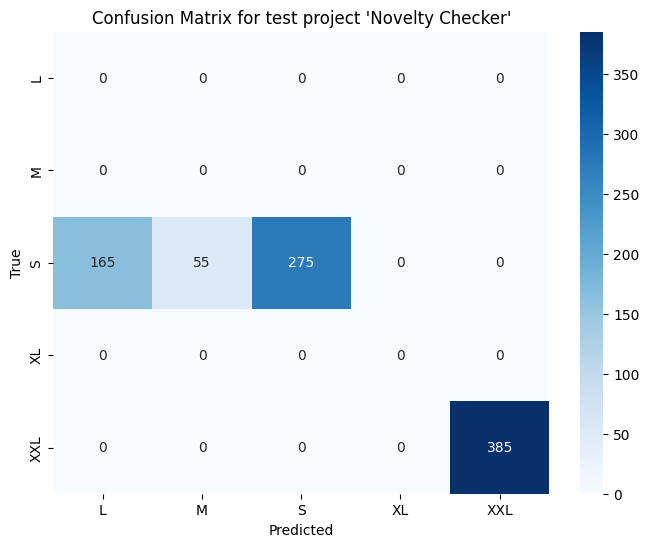

====================Decision Tree====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.78      0.88       495
          XL       0.00      0.00      0.00         0
         XXL       0.88      1.00      0.93       385

   micro avg       0.78      0.88      0.82       880
   macro avg       0.38      0.36      0.36       880
weighted avg       0.95      0.88      0.90       880
 samples avg       0.80      0.88      0.82       880

Precision: 0.9453125     Recall: 0.875      Accuracy: 0.75      F1 Score: 0.9005208333333333

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

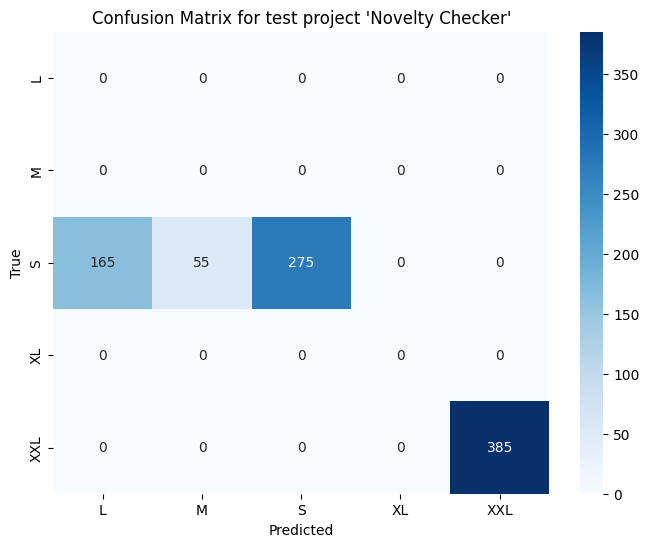

====================Multinomial Naive Bayes====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.67      0.80       495
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.55      0.38      0.44       880
   macro avg       0.20      0.13      0.16       880
weighted avg       0.56      0.38      0.45       880
 samples avg       0.22      0.38      0.27       880

Precision: 0.5625     Recall: 0.375      Accuracy: 0.0625      F1 Score: 0.45

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

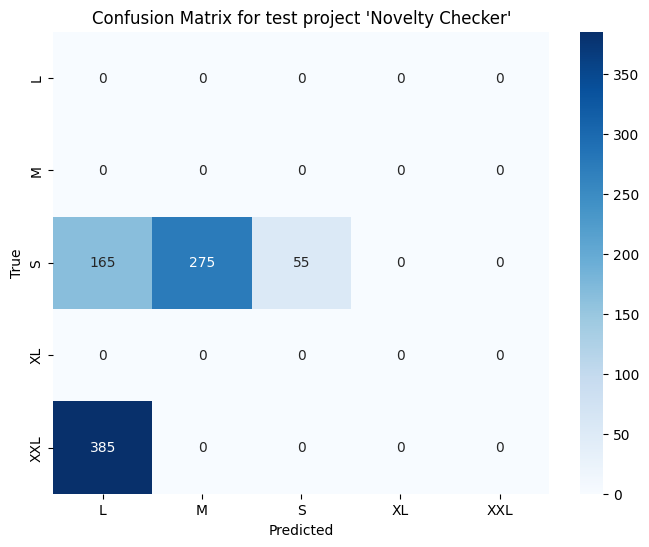

====================Adaboost====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.00      0.00      0.00        84
           S       0.50      0.70      0.58       550
          XL       0.00      0.00      0.00       660
         XXL       1.00      1.00      1.00       385

   micro avg       0.54      0.37      0.44      2064
   macro avg       0.30      0.34      0.32      2064
weighted avg       0.32      0.37      0.34      2064
 samples avg       0.35      0.37      0.36      2064

Precision: 0.31976744186046513     Recall: 0.37306201550387597      Accuracy: 0.31976744186046513      F1 Score: 0.3419735142118863

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

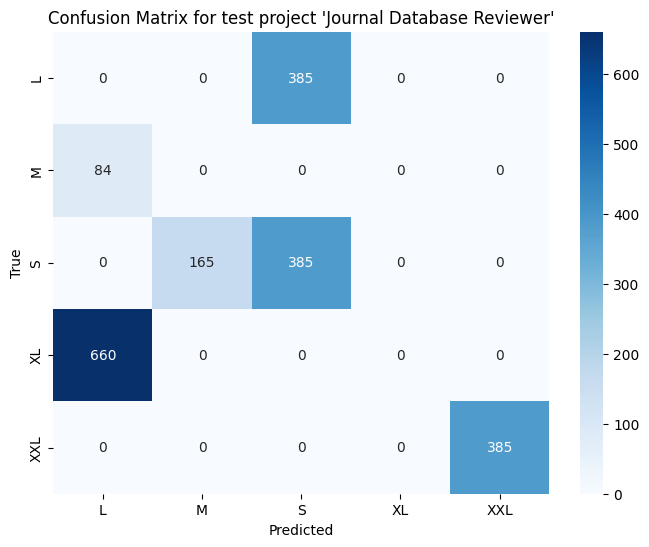

====================Decision Tree====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.60      1.00      0.75        84
           S       0.50      0.70      0.58       550
          XL       0.00      0.00      0.00       660
         XXL       1.00      1.00      1.00       385

   micro avg       0.61      0.41      0.49      2064
   macro avg       0.42      0.54      0.47      2064
weighted avg       0.34      0.41      0.37      2064
 samples avg       0.39      0.41      0.40      2064

Precision: 0.3443617199263845     Recall: 0.41375968992248063      Accuracy: 0.36046511627906974      F1 Score: 0.37263364561244944

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

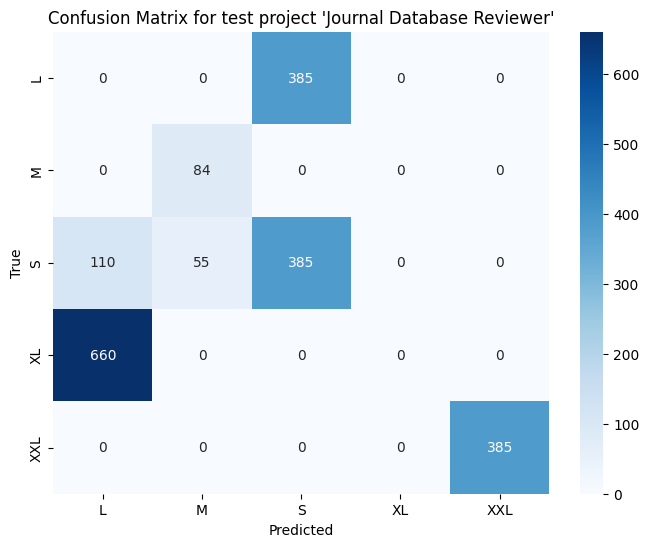

====================Multinomial Naive Bayes====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.10      1.00      0.18        84
           S       0.32      0.40      0.36       550
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00       385

   micro avg       0.18      0.15      0.16      2064
   macro avg       0.08      0.28      0.11      2064
weighted avg       0.09      0.15      0.10      2064
 samples avg       0.10      0.15      0.12      2064

Precision: 0.08908872629658998     Recall: 0.14728682170542637      Accuracy: 0.05329457364341085      F1 Score: 0.10192033992621125

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

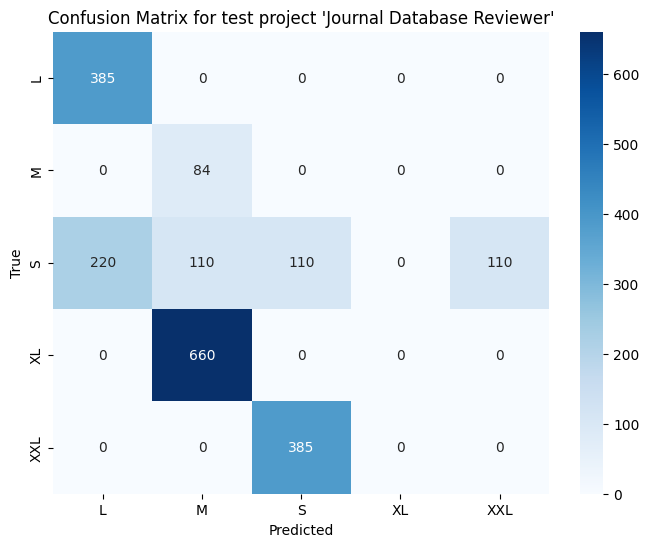

====================Adaboost====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00       168
           S       0.40      0.33      0.36       165
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.25      0.06      0.09       993
   macro avg       0.08      0.07      0.07       993
weighted avg       0.07      0.06      0.06       993
 samples avg       0.06      0.06      0.06       993

Precision: 0.06574800582494729     Recall: 0.0553877139979859      Accuracy: 0.0553877139979859      F1 Score: 0.0601248211162347

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

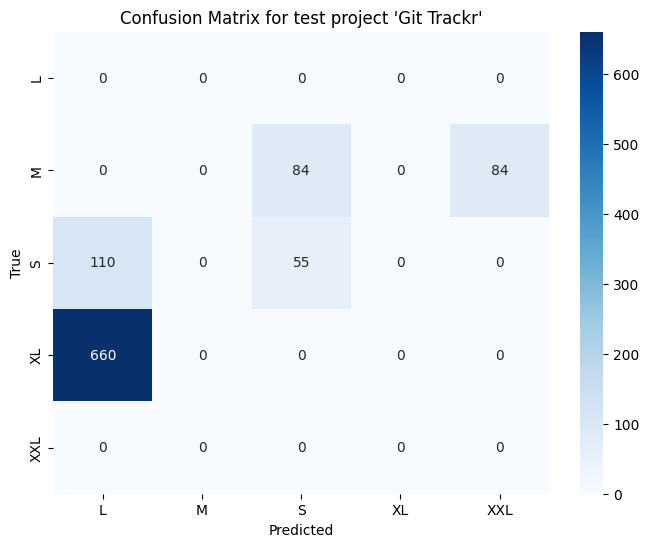

====================Decision Tree====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.50      0.67       168
           S       0.07      0.33      0.11       165
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.13      0.14      0.14       993
   macro avg       0.21      0.17      0.16       993
weighted avg       0.18      0.14      0.13       993
 samples avg       0.08      0.14      0.10       993

Precision: 0.18062230355920733     Recall: 0.13997985901309165      Accuracy: 0.0553877139979859      F1 Score: 0.13175005118819286

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

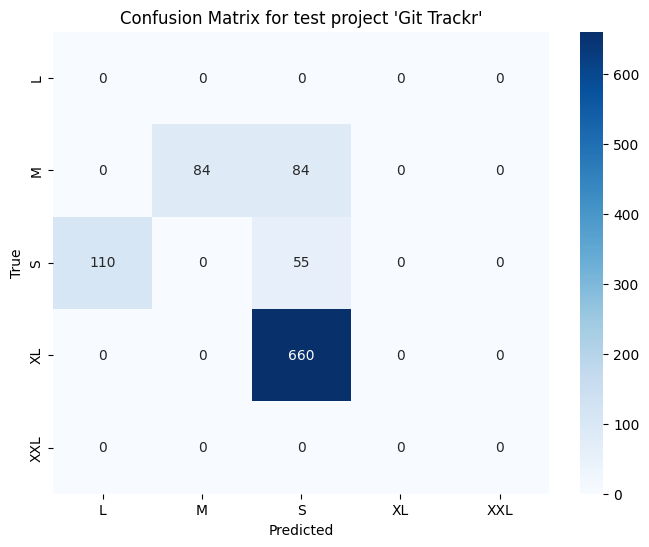

====================Multinomial Naive Bayes====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.50      0.67       168
           S       0.40      0.33      0.36       165
          XL       0.83      1.00      0.90       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.78      0.80      0.79       993
   macro avg       0.44      0.37      0.39       993
weighted avg       0.78      0.80      0.77       993
 samples avg       0.76      0.80      0.78       993

Precision: 0.7839569452469588     Recall: 0.8046324269889225      Accuracy: 0.7200402819738168      F1 Score: 0.7742449781855624

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

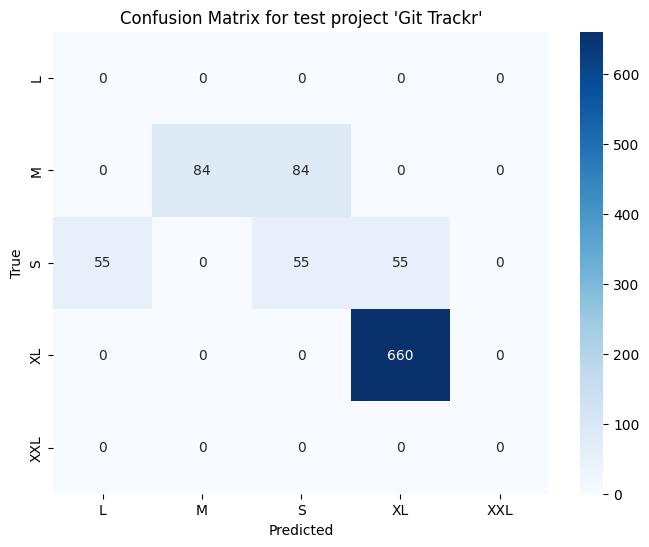

====================Adaboost====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.00      0.00      0.00       220
          XL       0.86      1.00      0.92       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.75      0.75      0.75       880
   macro avg       0.17      0.20      0.18       880
weighted avg       0.64      0.75      0.69       880
 samples avg       0.75      0.75      0.75       880

Precision: 0.6428571428571428     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.6923076923076923

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

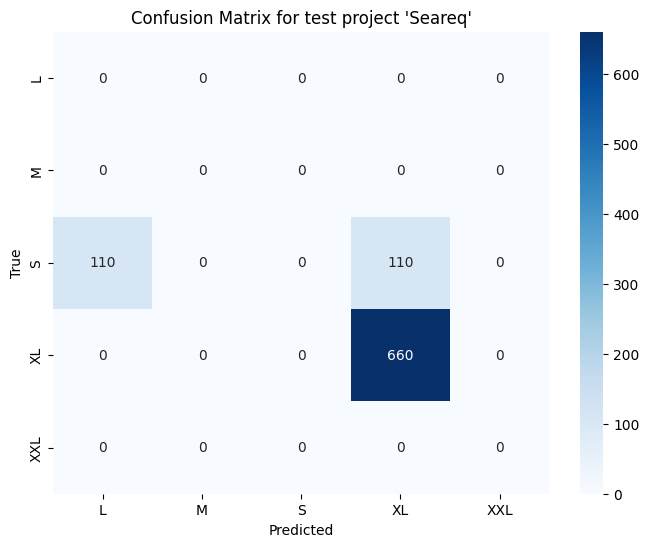

====================Decision Tree====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.14      0.50      0.22       220
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.07      0.12      0.09       880
   macro avg       0.03      0.10      0.04       880
weighted avg       0.04      0.12      0.06       880
 samples avg       0.06      0.12      0.08       880

Precision: 0.03571428571428571     Recall: 0.125      Accuracy: 0.0      F1 Score: 0.05555555555555556

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

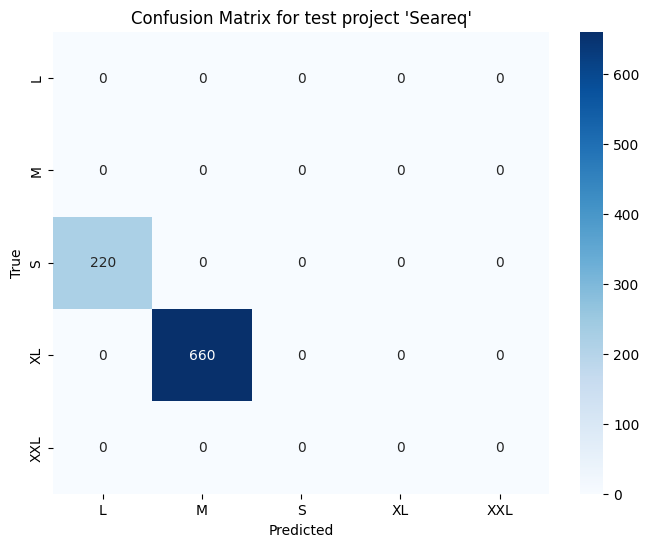

====================Multinomial Naive Bayes====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.00      0.00      0.00       220
          XL       0.86      1.00      0.92       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.46      0.75      0.57       880
   macro avg       0.17      0.20      0.18       880
weighted avg       0.64      0.75      0.69       880
 samples avg       0.38      0.75      0.50       880

Precision: 0.6428571428571428     Recall: 0.75      Accuracy: 0.0      F1 Score: 0.6923076923076923

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

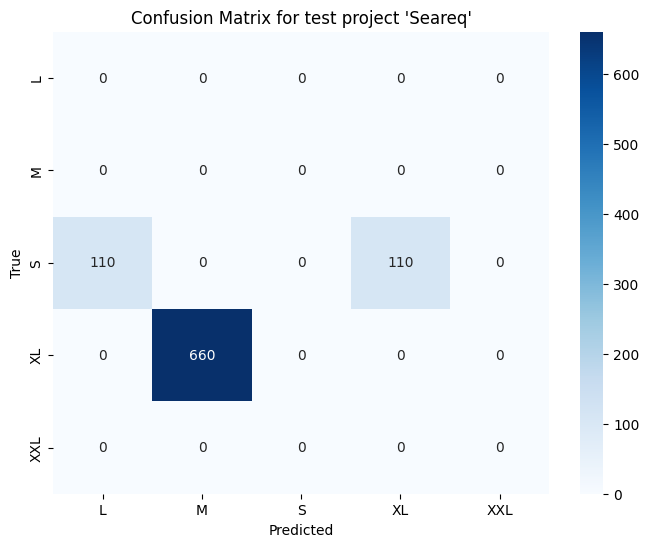

====================Adaboost====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.00      0.00      0.00       168
           S       0.88      0.73      0.80       825
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.51      0.44      0.47      1378
   macro avg       0.18      0.15      0.16      1378
weighted avg       0.53      0.44      0.48      1378
 samples avg       0.44      0.44      0.44      1378



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.5257035184877012     Recall: 0.4390420899854862      Accuracy: 0.4390420899854862      F1 Score: 0.478480481159876

Confusion matrix for test project 'Sales Monitoring on Multimarket':


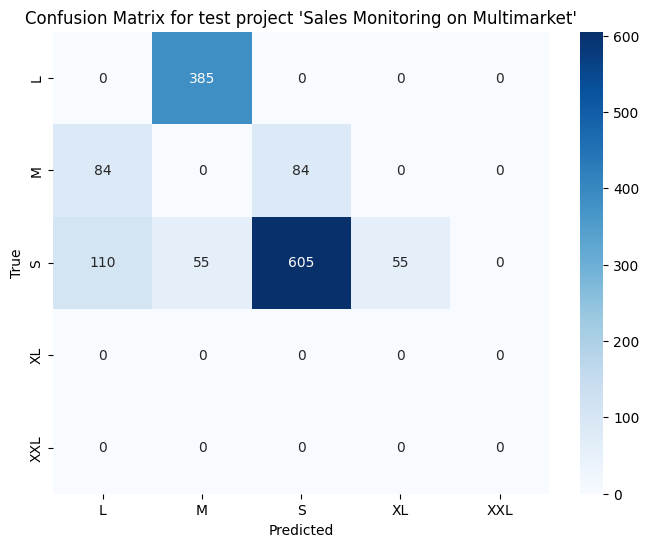

====================Decision Tree====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.16      0.50      0.24       168
           S       0.60      0.87      0.71       825
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.36      0.58      0.45      1378
   macro avg       0.15      0.27      0.19      1378
weighted avg       0.38      0.58      0.46      1378
 samples avg       0.56      0.58      0.57      1378



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.3810860190104573     Recall: 0.5798258345428157      Accuracy: 0.5399129172714079      F1 Score: 0.45574643042439966

Confusion matrix for test project 'Sales Monitoring on Multimarket':


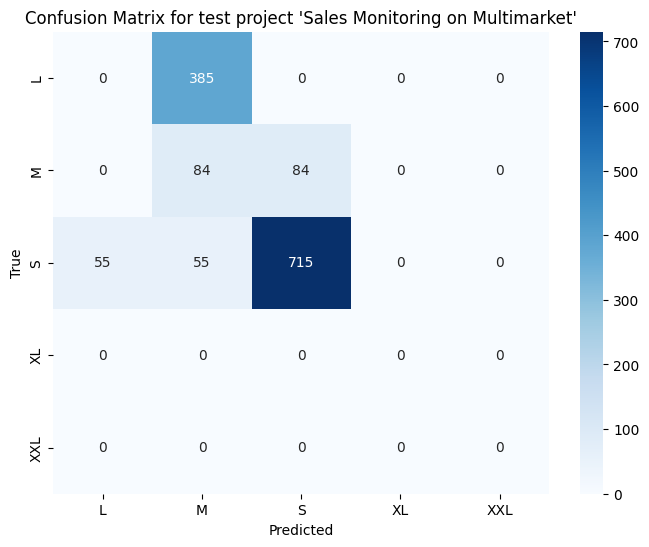

====================Multinomial Naive Bayes====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.13      0.50      0.21       168
           S       0.72      0.27      0.39       825
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.20      0.22      0.21      1378
   macro avg       0.17      0.15      0.12      1378
weighted avg       0.45      0.22      0.26      1378
 samples avg       0.17      0.22      0.19      1378



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.44941810505302965     Recall: 0.22060957910014514      Accuracy: 0.11973875181422351      F1 Score: 0.2588646531562609

Confusion matrix for test project 'Sales Monitoring on Multimarket':


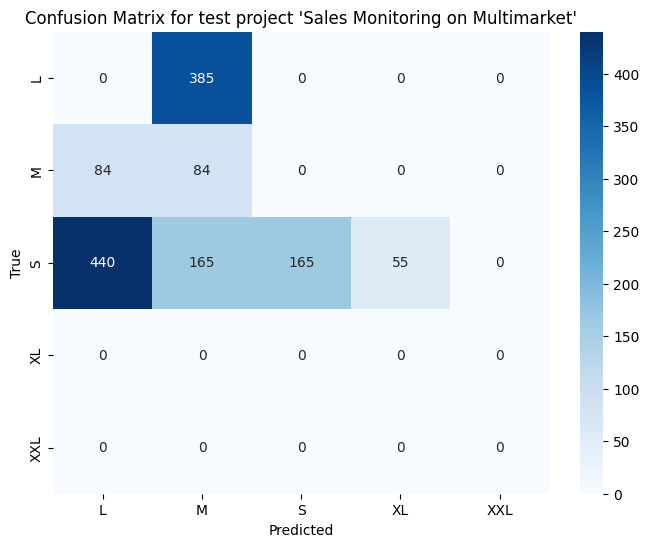

====================Adaboost====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.77      1.00      0.87       275
          XL       0.00      0.00      0.00         0
         XXL       1.00      0.50      0.67       770

   micro avg       0.89      0.58      0.70      1129
   macro avg       0.35      0.30      0.31      1129
weighted avg       0.87      0.58      0.67      1129
 samples avg       0.58      0.58      0.58      1129

Precision: 0.8686046023917436     Recall: 0.5845881310894597      Accuracy: 0.5845881310894597      F1 Score: 0.665985830029273

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

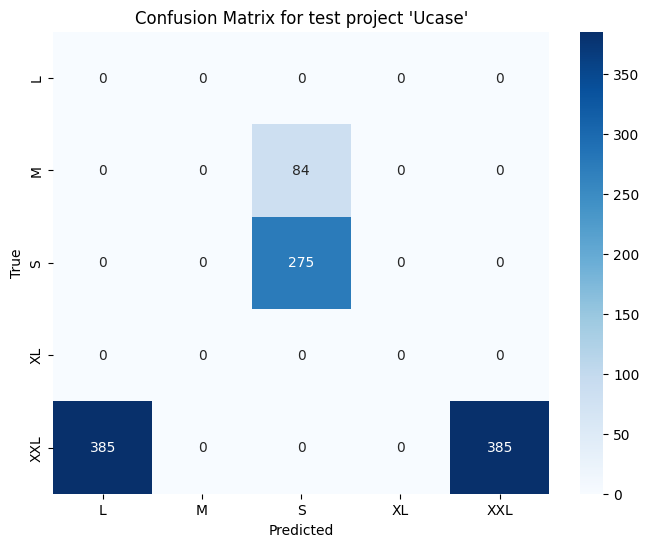

====================Decision Tree====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       1.00      1.00      1.00       275
          XL       0.00      0.00      0.00         0
         XXL       1.00      0.50      0.67       770

   micro avg       1.00      0.66      0.79      1129
   macro avg       0.60      0.50      0.53      1129
weighted avg       1.00      0.66      0.77      1129
 samples avg       0.66      0.66      0.66      1129

Precision: 1.0     Recall: 0.6589902568644819      Accuracy: 0.6589902568644819      F1 Score: 0.7726601712429878

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

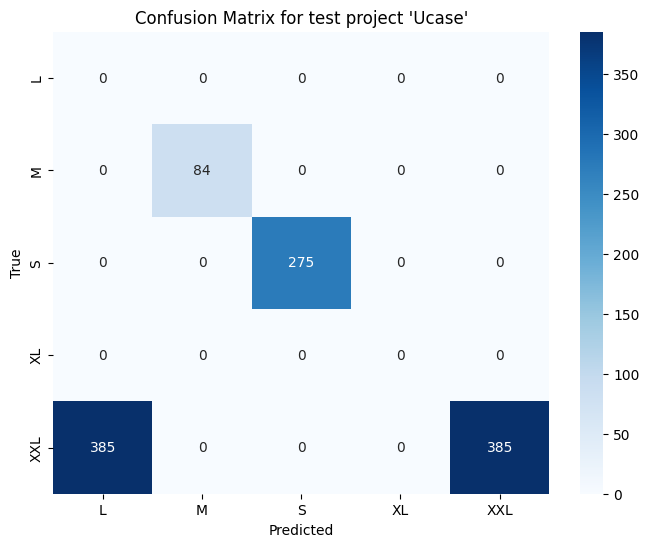

====================Multinomial Naive Bayes====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.34      1.00      0.50        84
           S       0.20      0.80      0.33       275
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       770

   micro avg       0.23      0.27      0.25      1129
   macro avg       0.11      0.36      0.17      1129
weighted avg       0.07      0.27      0.12      1129
 samples avg       0.16      0.27      0.20      1129

Precision: 0.07499452660188731     Recall: 0.26926483613817537      Accuracy: 0.048715677590788306      F1 Score: 0.11698356912506945

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

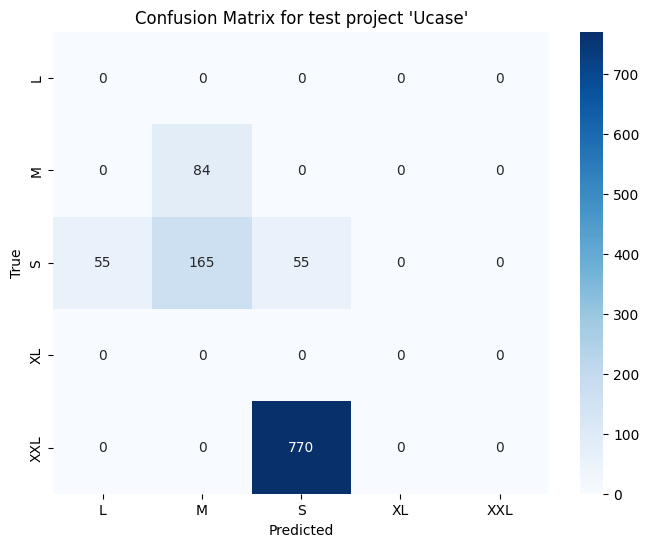

====================Adaboost====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       1.00      0.71      0.83       385
          XL       0.00      0.00      0.00         0
         XXL       1.00      0.33      0.50      1155

   micro avg       0.92      0.41      0.56      1624
   macro avg       0.40      0.21      0.27      1624
weighted avg       0.95      0.41      0.55      1624
 samples avg       0.41      0.41      0.41      1624

Precision: 0.9482758620689655     Recall: 0.4064039408866995      Accuracy: 0.4064039408866995      F1 Score: 0.5531609195402298

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

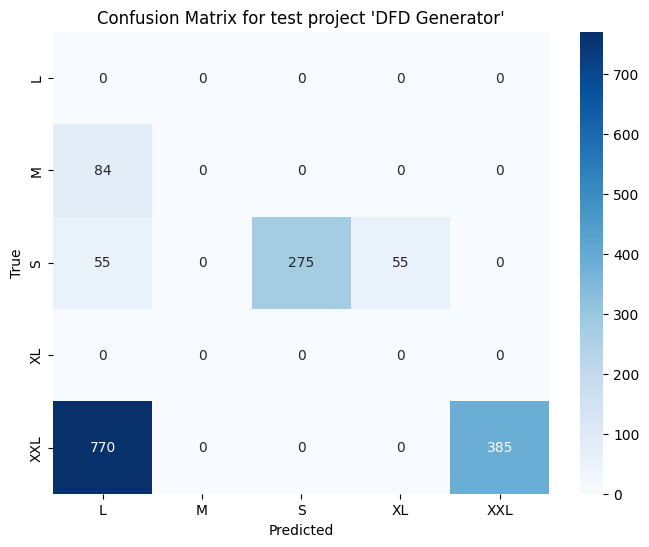

====================Decision Tree====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.10      1.00      0.18        84
           S       0.46      0.86      0.60       385
          XL       0.00      0.00      0.00         0
         XXL       1.00      0.33      0.50      1155

   micro avg       0.28      0.49      0.36      1624
   macro avg       0.31      0.44      0.26      1624
weighted avg       0.83      0.49      0.51      1624
 samples avg       0.48      0.49      0.48      1624

Precision: 0.8257109622994304     Recall: 0.4919950738916256      Accuracy: 0.458128078817734      F1 Score: 0.5071088522902728

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


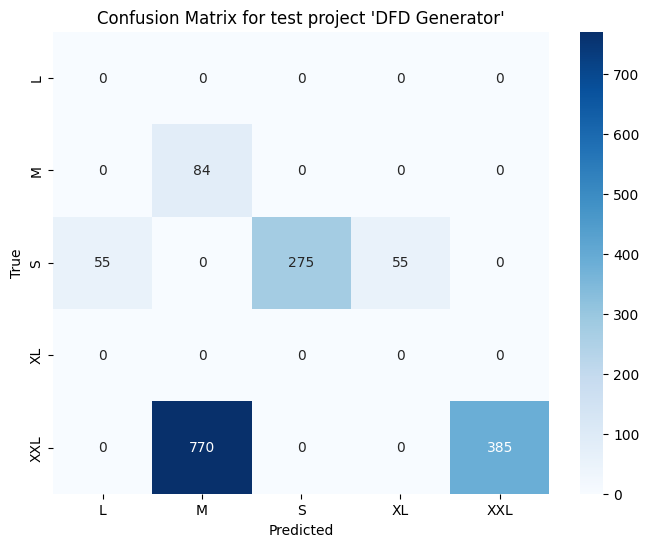

====================Multinomial Naive Bayes====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.34      1.00      0.50        84
           S       0.15      0.57      0.24       385
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00      1155

   micro avg       0.18      0.19      0.18      1624
   macro avg       0.10      0.31      0.15      1624
weighted avg       0.05      0.19      0.08      1624
 samples avg       0.11      0.19      0.14      1624

Precision: 0.05319631199041635     Recall: 0.18719211822660098      Accuracy: 0.033866995073891626      F1 Score: 0.08266249269690067

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

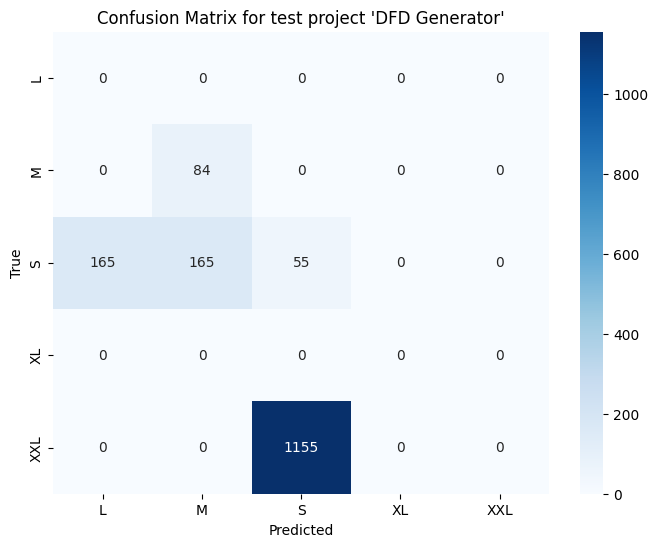

====================Adaboost====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       0.29      0.71      0.42       385
          XL       0.00      0.00      0.00      1320
         XXL       0.35      1.00      0.52       385

   micro avg       0.30      0.34      0.32      2174
   macro avg       0.33      0.54      0.39      2174
weighted avg       0.15      0.34      0.20      2174
 samples avg       0.25      0.34      0.28      2174

Precision: 0.1527071270090373     Recall: 0.3422263109475621      Accuracy: 0.16513339466421342      F1 Score: 0.20425312617124944

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

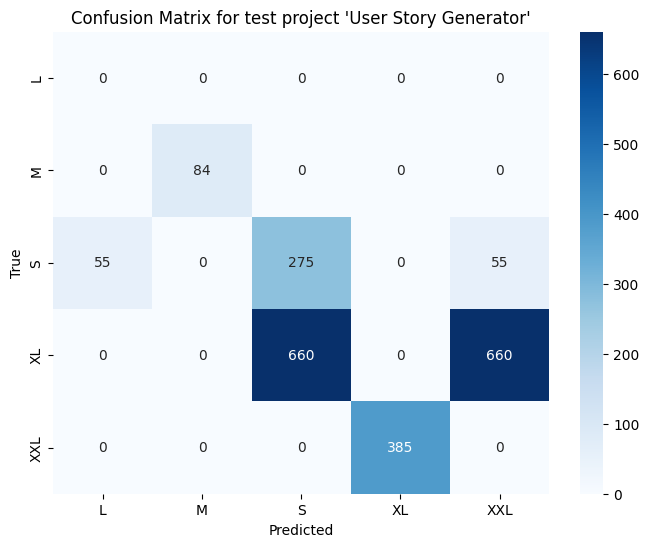

====================Decision Tree====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00        84
           S       0.37      1.00      0.54       385
          XL       0.00      0.00      0.00      1320
         XXL       0.33      1.00      0.50       385

   micro avg       0.37      0.39      0.38      2174
   macro avg       0.34      0.60      0.41      2174
weighted avg       0.16      0.39      0.22      2174
 samples avg       0.37      0.39      0.38      2174



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Precision: 0.16291418518697845     Recall: 0.39282428702851885      Accuracy: 0.3422263109475621      F1 Score: 0.2225426367560682

Confusion matrix for test project 'User Story Generator':


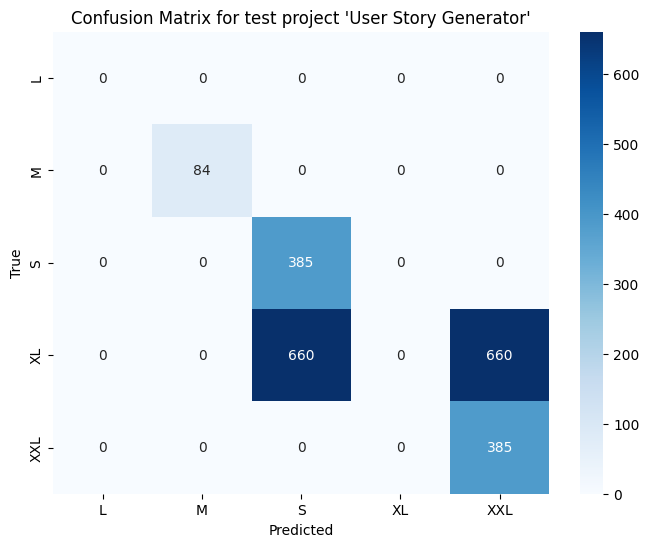

====================Multinomial Naive Bayes====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.34      1.00      0.50        84
           S       0.23      0.86      0.36       385
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00       385

   micro avg       0.24      0.19      0.21      2174
   macro avg       0.11      0.37      0.17      2174
weighted avg       0.05      0.19      0.08      2174
 samples avg       0.13      0.19      0.15      2174

Precision: 0.053089945404718966     Recall: 0.19043238270469182      Accuracy: 0.07589696412143514      F1 Score: 0.0828779406717851

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

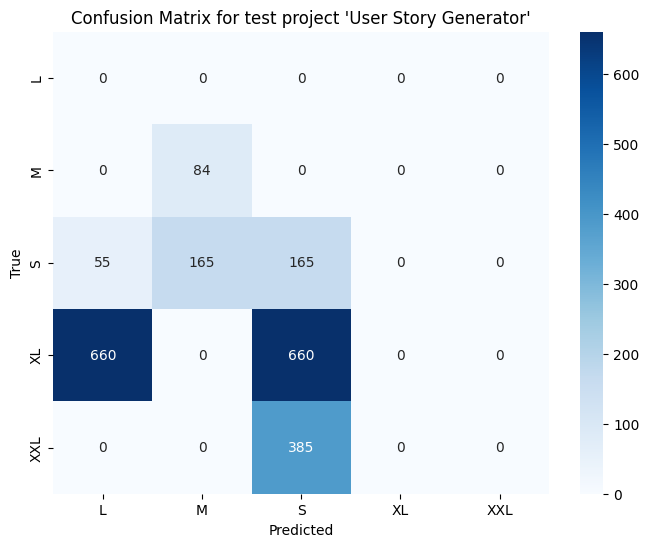

In [10]:
# Model (Numerik) <== All Features
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB


unique_projects = df['Project Name'].unique()

accuracy_list_Adaboost = []
accuracy_list_DecisionTree = []
accuracy_list_MultinomialNB = []
precision_list_Adaboost = []
precision_list_DecisionTree = []
precision_list_MultinomialNB = []
recall_list_Adaboost = []
recall_list_DecisionTree = []
recall_list_MultinomialNB = []
f1_score_list_Adaboost = []
f1_score_list_DecisionTree = []
f1_score_list_MultinomialNB = []
mean_accuracy = []

modelAdaboost = MultiOutputClassifier(AdaBoostClassifier(algorithm="SAMME", random_state=0))
modelDecisionTree = MultiOutputClassifier(DecisionTreeClassifier(random_state=0))
modelMNB = MultiOutputClassifier(MultinomialNB())


# Loop through each unique project name as test data
for test_project_name in unique_projects:
    # Get data for the test project
    test_project_data = df[df['Project Name'] == test_project_name]
    X_test = test_project_data[['number_word', 'number_scenario', 'number_of_step', 'number_of_S1', 'number_of_S2', 'number_of_S3', 'number_of_F1', 'number_of_F2', 'number_of_F3', 'number_of_F4', 'number_of_F5', 'number_of_A1', 'number_of_A2', 'number_of_A3', 'number_of_A4', 'number_of_A5', 'number_of_A6', 'number_of_A7']]

    # Get data for training projects (all data except the test project)
    train_projects_data = df[df['Project Name'] != test_project_name]
    X_train = train_projects_data[['number_word', 'number_scenario', 'number_of_step', 'number_of_S1', 'number_of_S2', 'number_of_S3', 'number_of_F1', 'number_of_F2', 'number_of_F3', 'number_of_F4', 'number_of_F5', 'number_of_A1', 'number_of_A2', 'number_of_A3', 'number_of_A4', 'number_of_A5', 'number_of_A6', 'number_of_A7']]

    # One hot encode the target variable for training data
    y_train = effort_dense_array[train_projects_data.index]

    # One hot encode the target variable for test data
    y_test = effort_dense_array[test_project_data.index]

    # Adaboost
    modelAdaboost.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelAdaboost.predict(X_test)

    print("====================Adaboost====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_Adaboost.append(accuracy)
    precision_list_Adaboost.append(precision)
    recall_list_Adaboost.append(recall)
    f1_score_list_Adaboost.append(f1)

    # Decision Tree
    modelDecisionTree.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelDecisionTree.predict(X_test)

    print("====================Decision Tree====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_DecisionTree.append(accuracy)
    precision_list_DecisionTree.append(precision)
    recall_list_DecisionTree.append(recall)
    f1_score_list_DecisionTree.append(f1)

    # Decision Tree
    modelMNB.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelMNB.predict(X_test)

    print("====================Multinomial Naive Bayes====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_MultinomialNB.append(accuracy)
    precision_list_MultinomialNB.append(precision)
    recall_list_MultinomialNB.append(recall)
    f1_score_list_MultinomialNB.append(f1)

In [11]:
# Performance Report
# Simpan data ke dalam DataFrame
data = {
    "Project": unique_projects,
    'Precision_Adaboost': precision_list_Adaboost,
    'Recall_Adaboost': recall_list_Adaboost,
    'Accuracy_Adaboost': accuracy_list_Adaboost,
    'F1_Score_Adaboost': f1_score_list_Adaboost,
    'Precision_DecisionTree': precision_list_DecisionTree,
    'Recall_DecisionTree': recall_list_DecisionTree,
    'Accuracy_DecisionTree': accuracy_list_DecisionTree,
    'F1_Score_DecisionTree': f1_score_list_DecisionTree,
    'Precision_MultinomialNB': precision_list_MultinomialNB,
    'Recall_MultinomialNB': recall_list_MultinomialNB,
    'Accuracy_MultinomialNB': accuracy_list_MultinomialNB,
    'F1_Score_MultinomialNB': f1_score_list_MultinomialNB,
}

# Buat DataFrame
df_result = pd.DataFrame(data)

# Tampilkan DataFrame
df_result


,Project,Precision_Adaboost,Recall_Adaboost,Accuracy_Adaboost,F1_Score_Adaboost,Precision_DecisionTree,Recall_DecisionTree,Accuracy_DecisionTree,F1_Score_DecisionTree,Precision_MultinomialNB,Recall_MultinomialNB,Accuracy_MultinomialNB,F1_Score_MultinomialNB
0,Akobesi,0.048248,0.063959,0.063959,0.047763,0.003768,0.019680,0.019680,0.006325,0.051277,0.098667,0.083639,0.049483
1,Jisebi Checker,0.413016,0.275344,0.275344,0.330413,0.476549,0.449312,0.449312,0.454671,0.413016,0.344180,0.068836,0.375469
2,Novelty Checker,1.000000,0.750000,0.750000,0.839286,0.945312,0.875000,0.750000,0.900521,0.562500,0.375000,0.062500,0.450000
3,Journal Database Reviewer,0.319767,0.373062,0.319767,0.341974,0.344362,0.413760,0.360465,0.372634,0.089089,0.147287,0.053295,0.101920
4,Git Trackr,0.065748,0.055388,0.055388,0.060125,0.180622,0.139980,0.055388,0.131750,0.783957,0.804632,0.720040,0.774245
5,Seareq,0.642857,0.750000,0.750000,0.692308,0.035714,0.125000,0.000000,0.055556,0.642857,0.750000,0.000000,0.692308
6,Sales Monitoring on Multimarket,0.525704,0.439042,0.439042,0.478480,0.381086,0.579826,0.539913,0.455746,0.449418,0.220610,0.119739,0.258865
7,Ucase,0.868605,0.584588,0.584588,0.665986,1.000000,0.658990,0.658990,0.772660,0.074995,0.269265,0.048716,0.116984
8,DFD Generator,0.948276,0.406404,0.406404,0.553161,0.825711,0.491995,0.458128,0.507109,0.053196,0.187192,0.033867,0.082662
9,User Story Generator,0.152707,0.342226,0.165133,0.204253,0.162914,0.392824,0.342226,0.222543,0.053090,0.190432,0.075897,0.082878


In [12]:
# Mean Accuracy
mean_accuracy.append(np.mean(accuracy_list_Adaboost))
mean_accuracy.append(np.mean(accuracy_list_DecisionTree))
mean_accuracy.append(np.mean(accuracy_list_MultinomialNB))

print("Mean Accuracy")
print(mean_accuracy)

Mean Accuracy
[0.3809626101941187, 0.36341017904143225, 0.12665282551921261]


Feature Selection

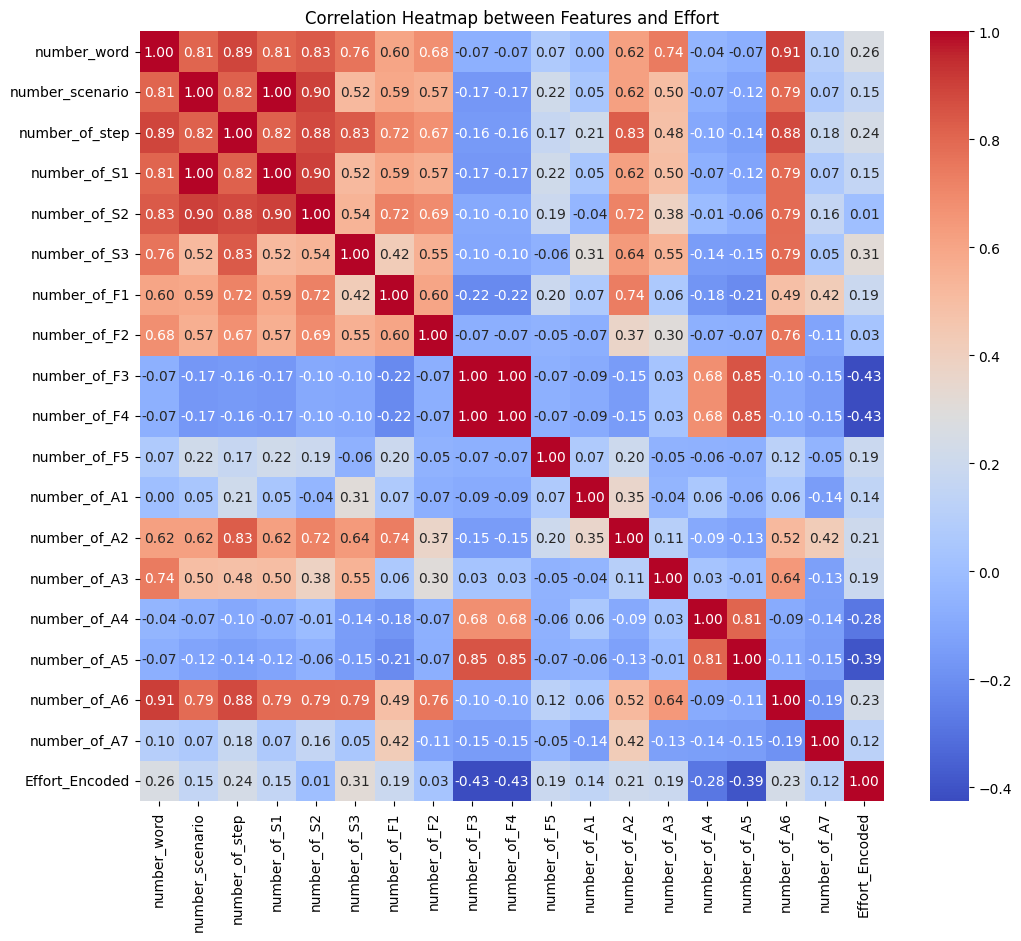

In [13]:
# Heatmap
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Effort' column
df['Effort_Encoded'] = label_encoder.fit_transform(df['Effort'])

# Drop the original 'Effort' column if needed
# df.drop('Effort', axis=1, inplace=True)

# Now, you can proceed to calculate the correlation matrix
data = pd.concat([df[['number_word', 'number_scenario', 'number_of_step', 'number_of_S1', 'number_of_S2', 'number_of_S3', 'number_of_F1', 'number_of_F2', 'number_of_F3', 'number_of_F4', 'number_of_F5', 'number_of_A1', 'number_of_A2', 'number_of_A3', 'number_of_A4', 'number_of_A5', 'number_of_A6', 'number_of_A7']], df['Effort_Encoded']], axis=1)
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Features and Effort')
plt.show()


====================Adaboost====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00      3850
           M       0.00      0.00      0.00      3864
           S       0.00      0.00      0.00       990
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00      1155

   micro avg       0.00      0.00      0.00     11179
   macro avg       0.00      0.00      0.00     11179
weighted avg       0.00      0.00      0.00     11179
 samples avg       0.00      0.00      0.00     11179



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Akobesi':


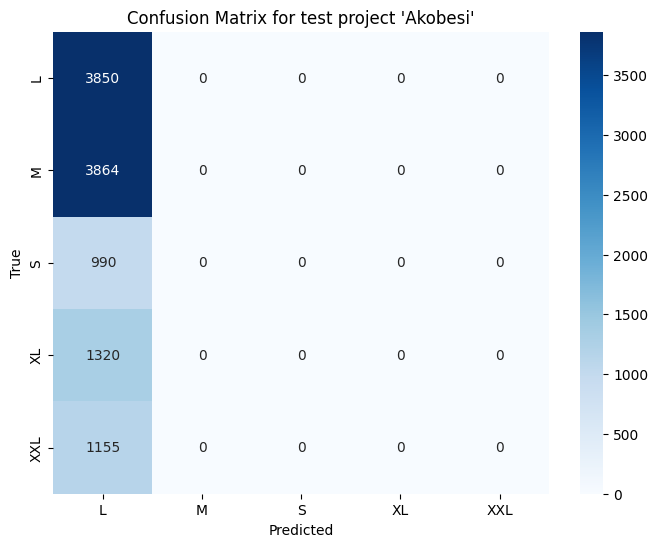

====================Decision Tree====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00      3850
           M       0.00      0.00      0.00      3864
           S       0.00      0.00      0.00       990
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00      1155

   micro avg       0.00      0.00      0.00     11179
   macro avg       0.00      0.00      0.00     11179
weighted avg       0.00      0.00      0.00     11179
 samples avg       0.00      0.00      0.00     11179



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Akobesi':


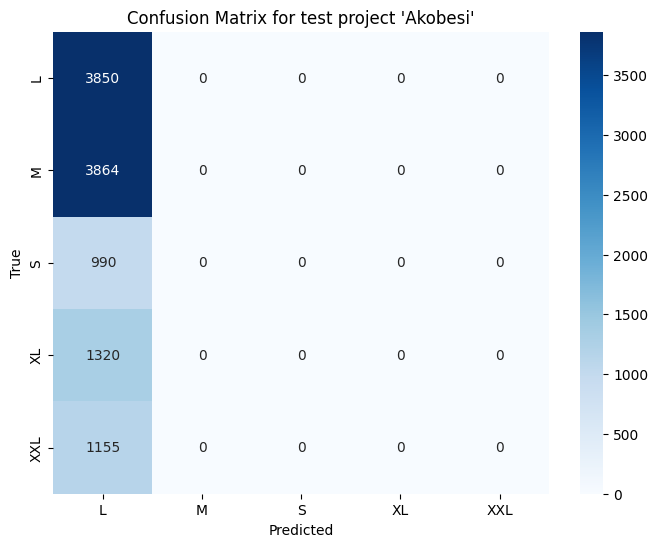

====================Multinomial Naive Bayes====================

Classification report for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           L       1.00      0.50      0.67      3850
           M       0.00      0.00      0.00      3864
           S       0.00      0.00      0.00       990
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00      1155

   micro avg       0.25      0.17      0.20     11179
   macro avg       0.20      0.10      0.13     11179
weighted avg       0.34      0.17      0.23     11179
 samples avg       0.04      0.17      0.07     11179



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.34439574201628054     Recall: 0.17219787100814027      Accuracy: 0.0      F1 Score: 0.229597161344187

Confusion matrix for test project 'Akobesi':


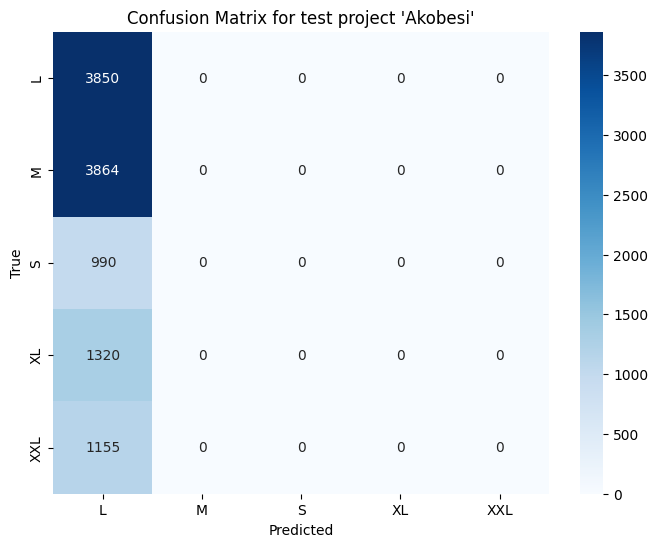

====================Adaboost====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.00      0.00      0.00       330
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.00      0.00      0.00       799
   macro avg       0.00      0.00      0.00       799
weighted avg       0.00      0.00      0.00       799
 samples avg       0.00      0.00      0.00       799

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

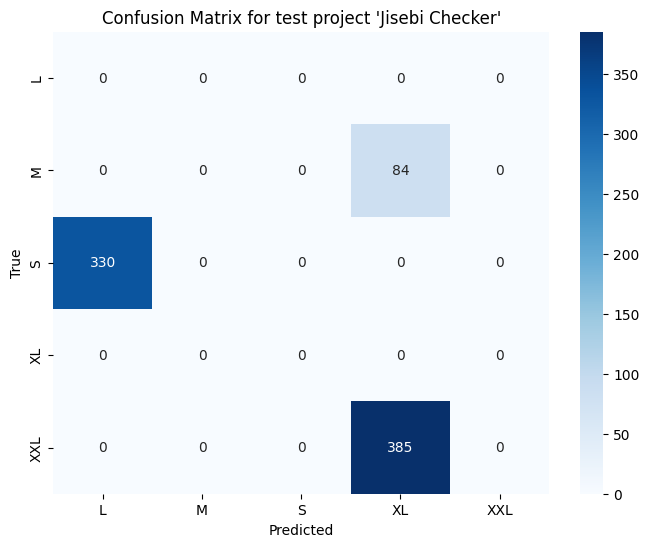

====================Decision Tree====================

Classification report for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.00      0.00      0.00       330
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.00      0.00      0.00       799
   macro avg       0.00      0.00      0.00       799
weighted avg       0.00      0.00      0.00       799
 samples avg       0.00      0.00      0.00       799

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Jisebi Checker':


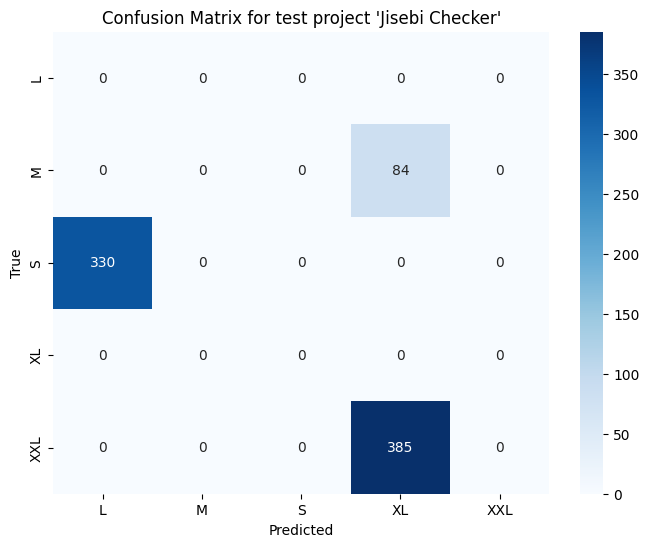

====================Multinomial Naive Bayes====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.00      0.00      0.00       330
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.00      0.00      0.00       799
   macro avg       0.00      0.00      0.00       799
weighted avg       0.00      0.00      0.00       799
 samples avg       0.00      0.00      0.00       799

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

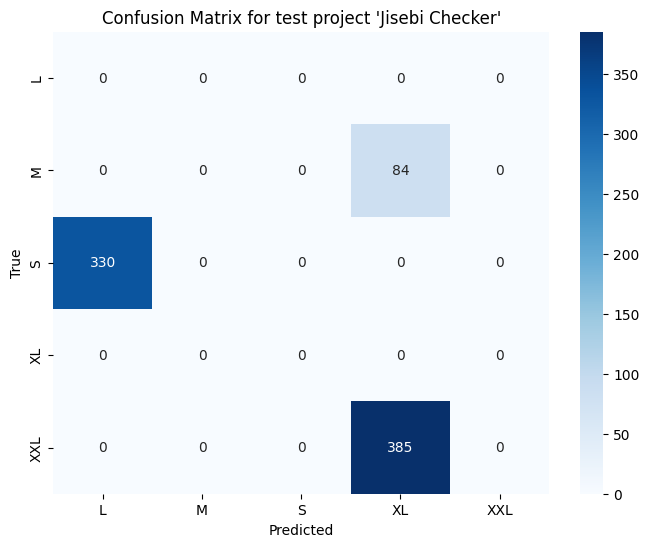

====================Adaboost====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.00      0.00      0.00       495
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.00      0.00      0.00       880
   macro avg       0.00      0.00      0.00       880
weighted avg       0.00      0.00      0.00       880
 samples avg       0.00      0.00      0.00       880

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

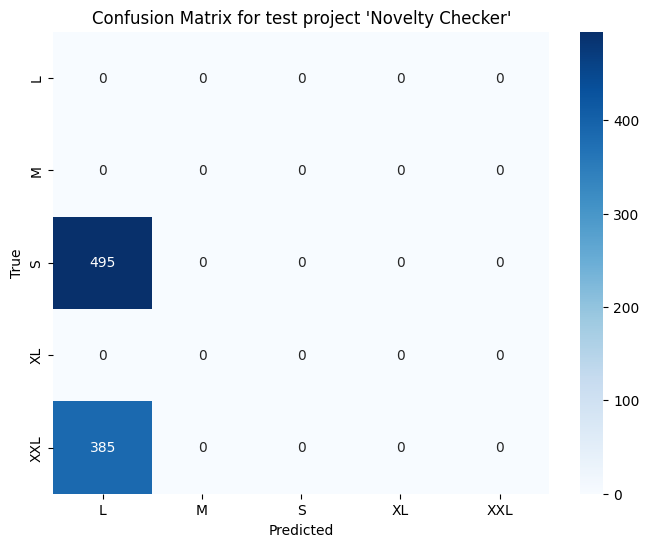

====================Decision Tree====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.00      0.00      0.00       495
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.00      0.00      0.00       880
   macro avg       0.00      0.00      0.00       880
weighted avg       0.00      0.00      0.00       880
 samples avg       0.00      0.00      0.00       880

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

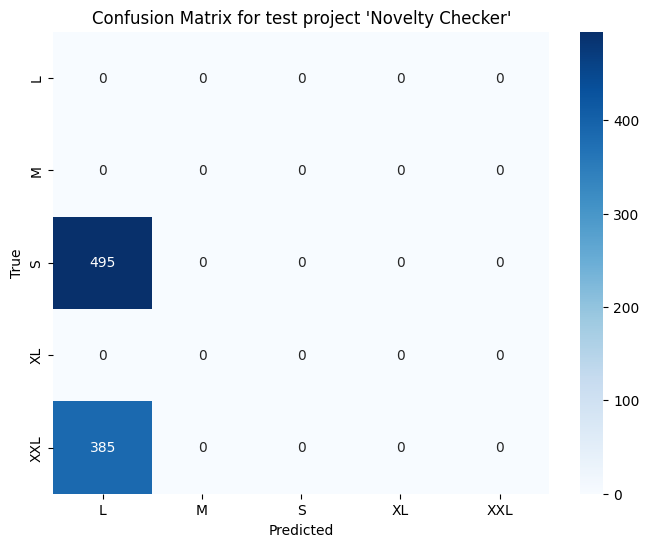

====================Multinomial Naive Bayes====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.00      0.00      0.00       495
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.00      0.00      0.00       880
   macro avg       0.00      0.00      0.00       880
weighted avg       0.00      0.00      0.00       880
 samples avg       0.00      0.00      0.00       880



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Novelty Checker':


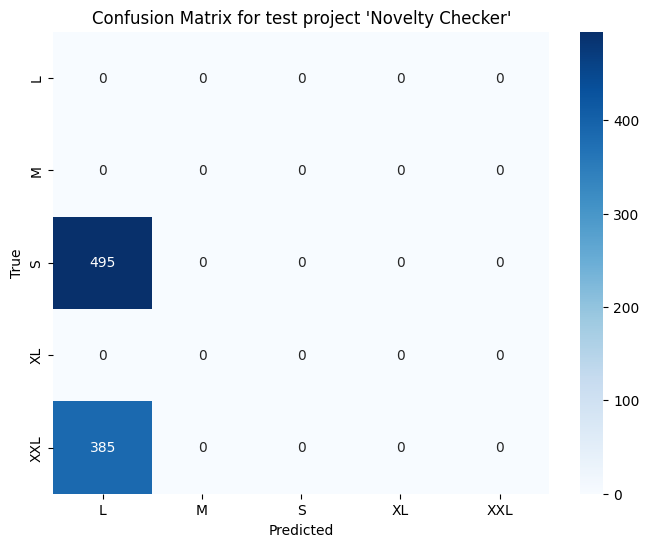

====================Adaboost====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.00      0.00      0.00        84
           S       0.00      0.00      0.00       550
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00       385

   micro avg       0.00      0.00      0.00      2064
   macro avg       0.00      0.00      0.00      2064
weighted avg       0.00      0.00      0.00      2064
 samples avg       0.00      0.00      0.00      2064

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

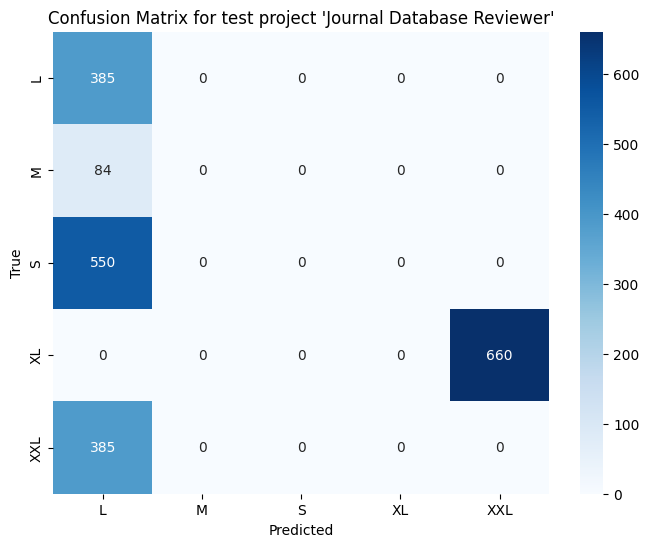

====================Decision Tree====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.00      0.00      0.00        84
           S       0.00      0.00      0.00       550
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00       385

   micro avg       0.00      0.00      0.00      2064
   macro avg       0.00      0.00      0.00      2064
weighted avg       0.00      0.00      0.00      2064
 samples avg       0.00      0.00      0.00      2064



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Journal Database Reviewer':


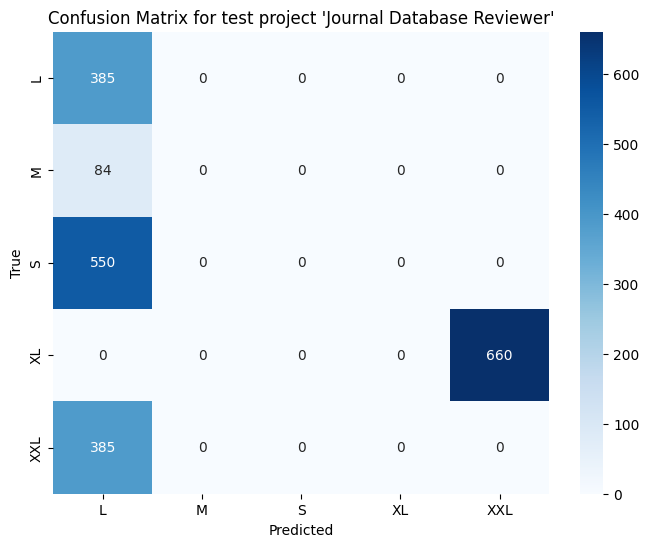

====================Multinomial Naive Bayes====================

Classification report for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.00      0.00      0.00        84
           S       0.00      0.00      0.00       550
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00       385

   micro avg       0.00      0.00      0.00      2064
   macro avg       0.00      0.00      0.00      2064
weighted avg       0.00      0.00      0.00      2064
 samples avg       0.00      0.00      0.00      2064

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Journal Database Reviewer':


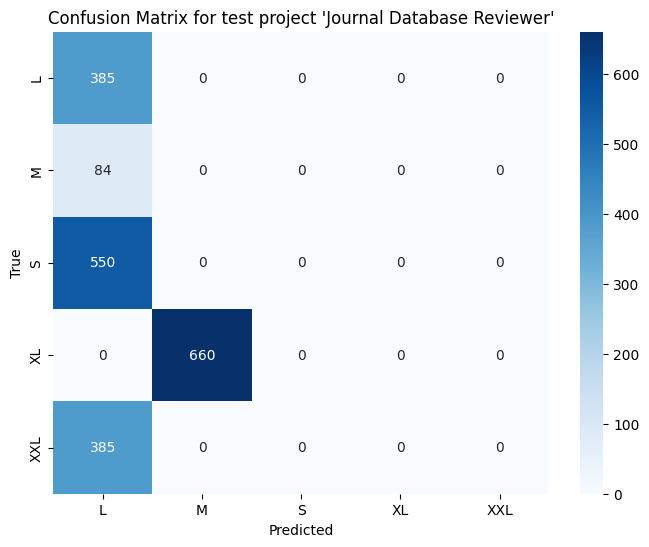

====================Adaboost====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00       168
           S       0.00      0.00      0.00       165
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00       993
   macro avg       0.00      0.00      0.00       993
weighted avg       0.00      0.00      0.00       993
 samples avg       0.00      0.00      0.00       993

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

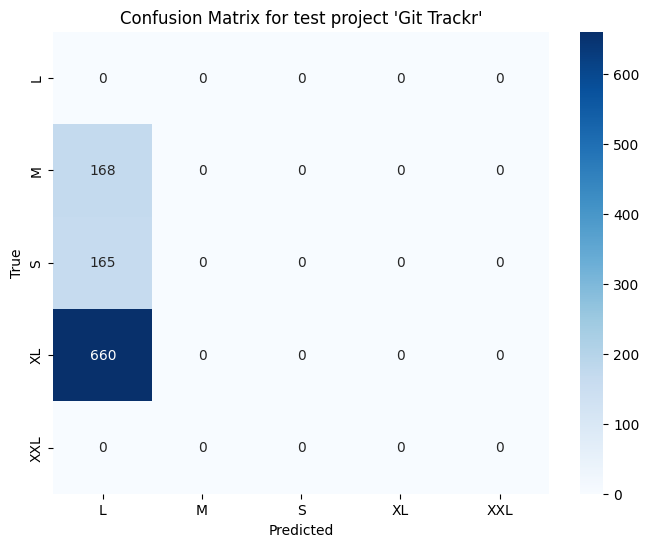

====================Decision Tree====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00       168
           S       0.00      0.00      0.00       165
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00       993
   macro avg       0.00      0.00      0.00       993
weighted avg       0.00      0.00      0.00       993
 samples avg       0.00      0.00      0.00       993

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

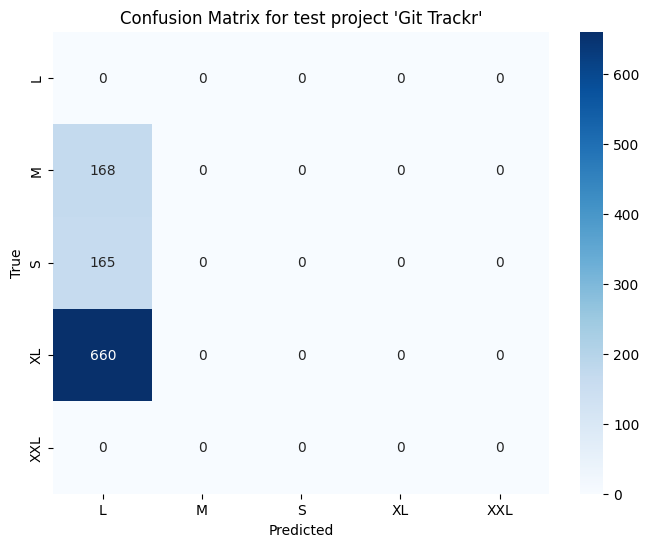

====================Multinomial Naive Bayes====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00       168
           S       0.00      0.00      0.00       165
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00       993
   macro avg       0.00      0.00      0.00       993
weighted avg       0.00      0.00      0.00       993
 samples avg       0.00      0.00      0.00       993

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

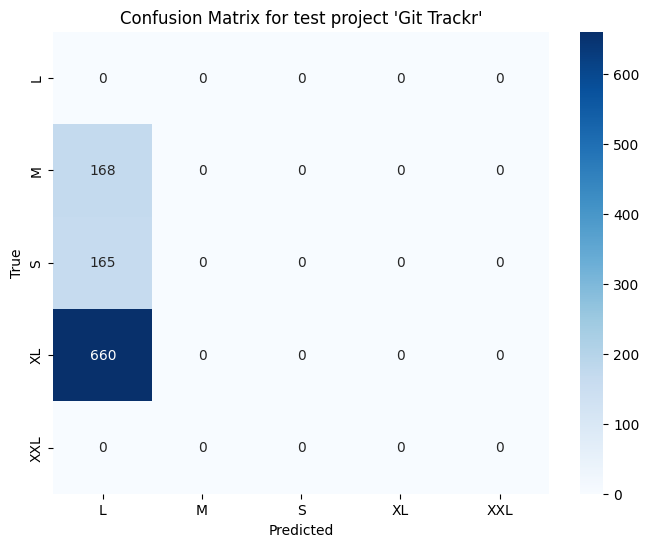

====================Adaboost====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.00      0.00      0.00       220
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00       880
   macro avg       0.00      0.00      0.00       880
weighted avg       0.00      0.00      0.00       880
 samples avg       0.00      0.00      0.00       880

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

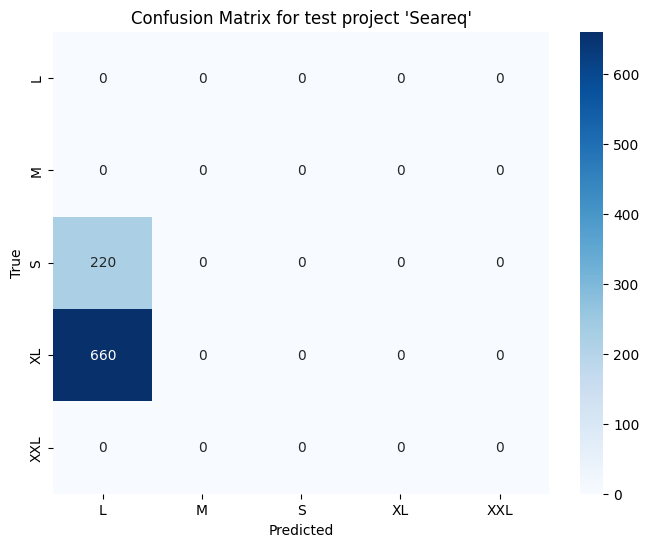

====================Decision Tree====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.00      0.00      0.00       220
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00       880
   macro avg       0.00      0.00      0.00       880
weighted avg       0.00      0.00      0.00       880
 samples avg       0.00      0.00      0.00       880

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

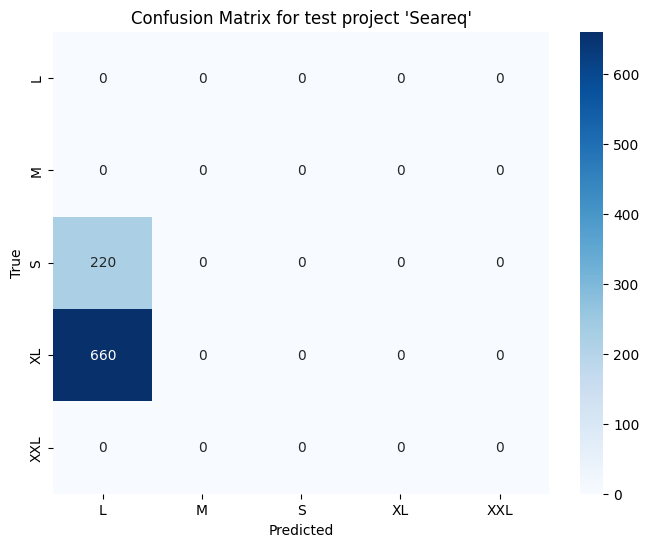

====================Multinomial Naive Bayes====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.00      0.00      0.00       220
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00       880
   macro avg       0.00      0.00      0.00       880
weighted avg       0.00      0.00      0.00       880
 samples avg       0.00      0.00      0.00       880

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

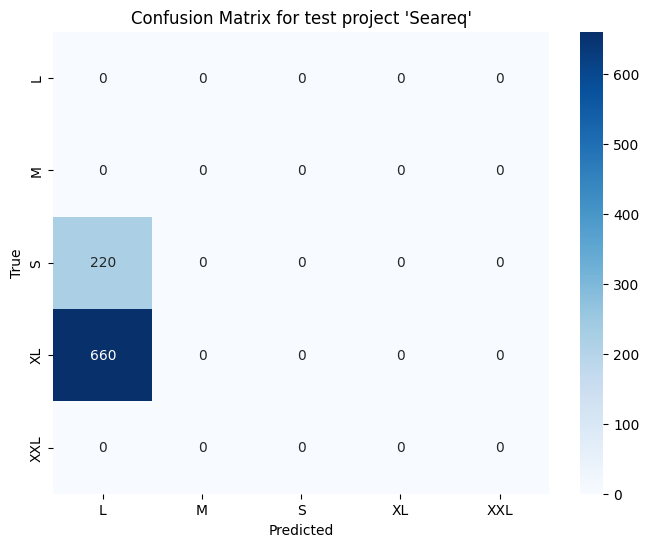

====================Adaboost====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.00      0.00      0.00       168
           S       0.00      0.00      0.00       825
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00      1378
   macro avg       0.00      0.00      0.00      1378
weighted avg       0.00      0.00      0.00      1378
 samples avg       0.00      0.00      0.00      1378

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

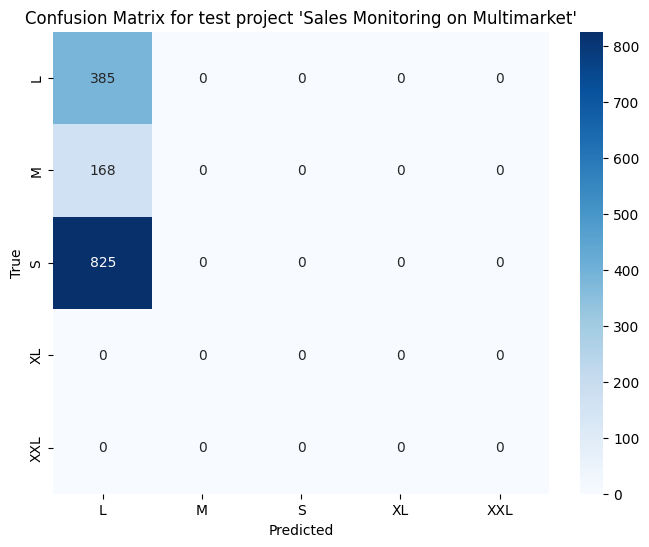

====================Decision Tree====================

Classification report for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.00      0.00      0.00       168
           S       0.00      0.00      0.00       825
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00      1378
   macro avg       0.00      0.00      0.00      1378
weighted avg       0.00      0.00      0.00      1378
 samples avg       0.00      0.00      0.00      1378

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", 

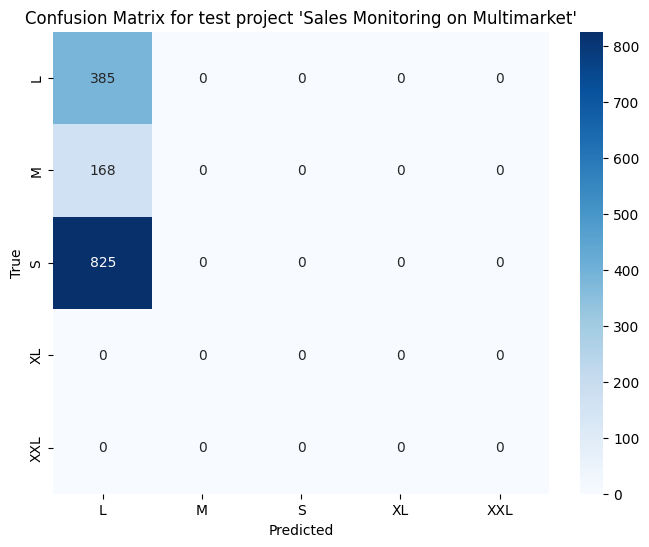

====================Multinomial Naive Bayes====================

Classification report for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.00      0.00      0.00       168
           S       0.00      0.00      0.00       825
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00      1378
   macro avg       0.00      0.00      0.00      1378
weighted avg       0.00      0.00      0.00      1378
 samples avg       0.00      0.00      0.00      1378



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Sales Monitoring on Multimarket':


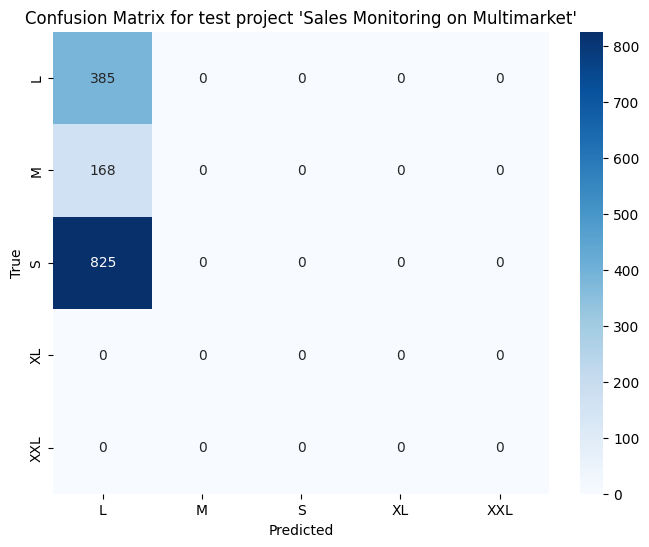

====================Adaboost====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.00      0.00      0.00       275
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       770

   micro avg       0.00      0.00      0.00      1129
   macro avg       0.00      0.00      0.00      1129
weighted avg       0.00      0.00      0.00      1129
 samples avg       0.00      0.00      0.00      1129

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

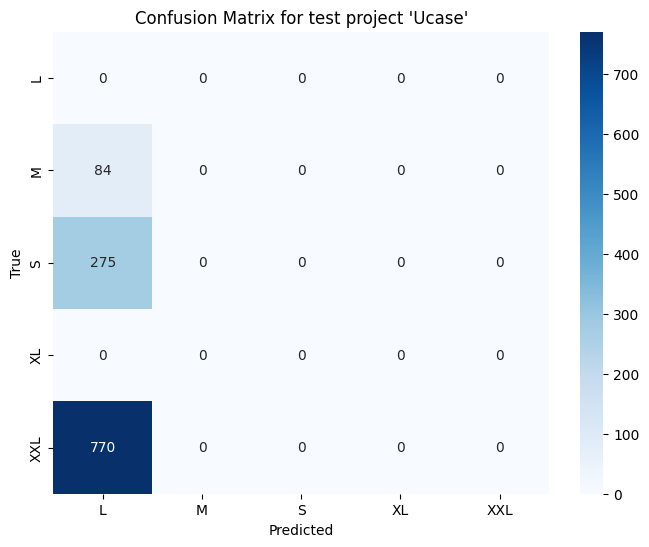

====================Decision Tree====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.00      0.00      0.00       275
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       770

   micro avg       0.00      0.00      0.00      1129
   macro avg       0.00      0.00      0.00      1129
weighted avg       0.00      0.00      0.00      1129
 samples avg       0.00      0.00      0.00      1129

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

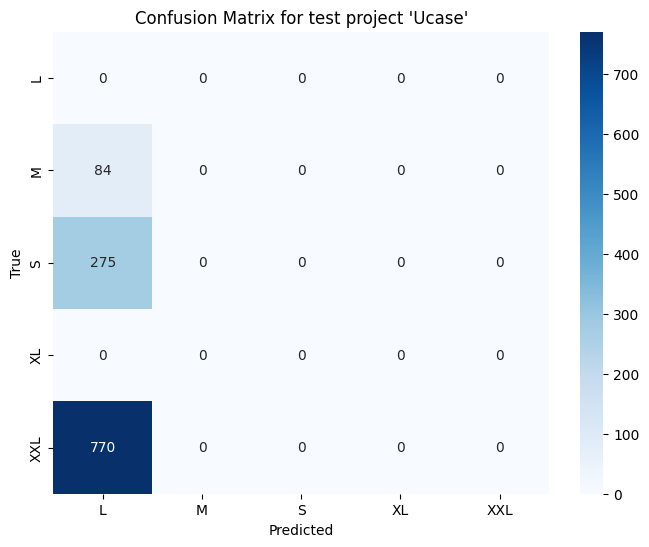

====================Multinomial Naive Bayes====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.00      0.00      0.00       275
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       770

   micro avg       0.00      0.00      0.00      1129
   macro avg       0.00      0.00      0.00      1129
weighted avg       0.00      0.00      0.00      1129
 samples avg       0.00      0.00      0.00      1129

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

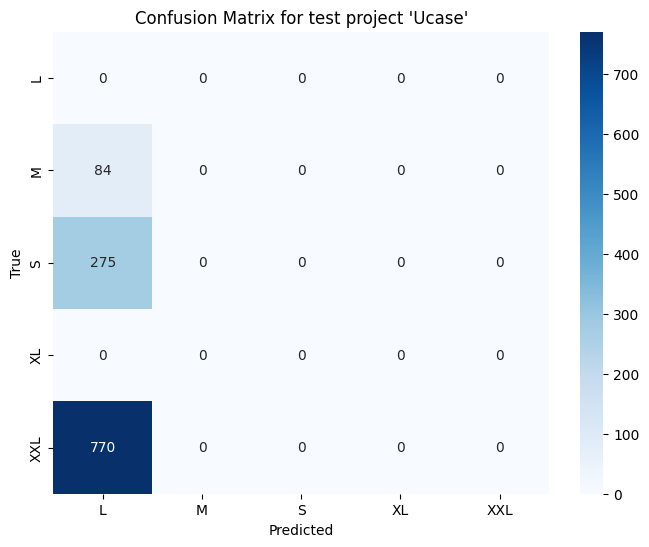

====================Adaboost====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.00      0.00      0.00       385
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00      1155

   micro avg       0.00      0.00      0.00      1624
   macro avg       0.00      0.00      0.00      1624
weighted avg       0.00      0.00      0.00      1624
 samples avg       0.00      0.00      0.00      1624

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

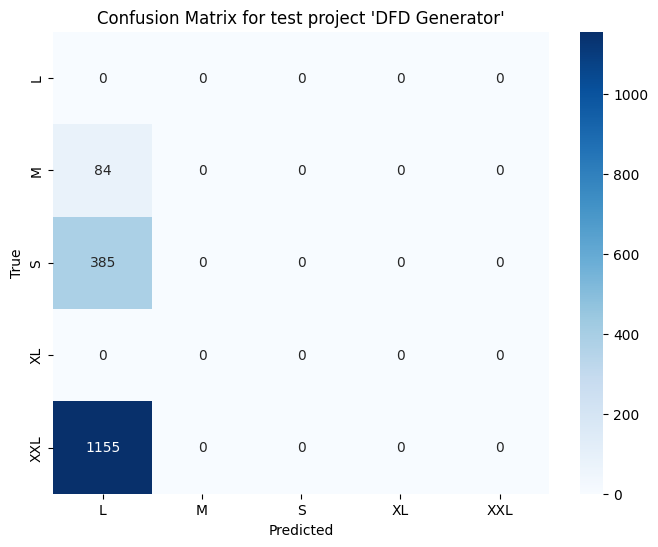

====================Decision Tree====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.00      0.00      0.00       385
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00      1155

   micro avg       0.00      0.00      0.00      1624
   macro avg       0.00      0.00      0.00      1624
weighted avg       0.00      0.00      0.00      1624
 samples avg       0.00      0.00      0.00      1624

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

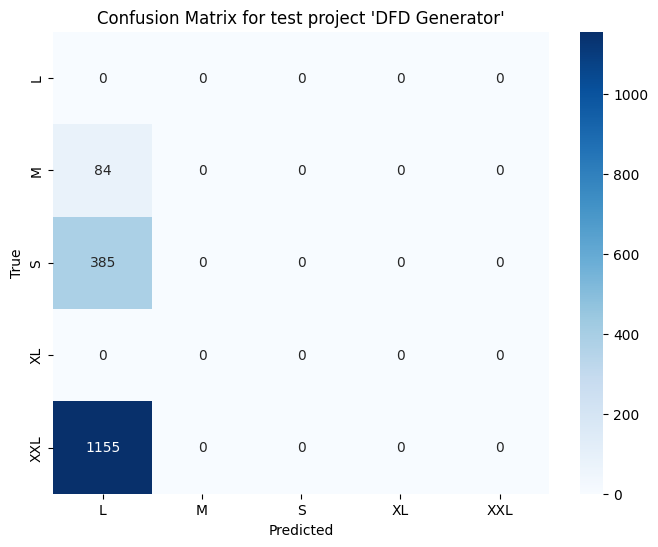

====================Multinomial Naive Bayes====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.00      0.00      0.00       385
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00      1155

   micro avg       0.00      0.00      0.00      1624
   macro avg       0.00      0.00      0.00      1624
weighted avg       0.00      0.00      0.00      1624
 samples avg       0.00      0.00      0.00      1624

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

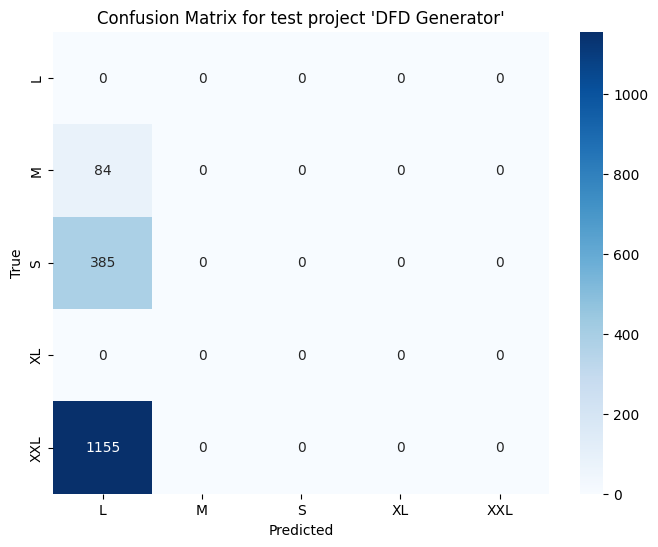

====================Adaboost====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.00      0.00      0.00       385
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00       385

   micro avg       0.00      0.00      0.00      2174
   macro avg       0.00      0.00      0.00      2174
weighted avg       0.00      0.00      0.00      2174
 samples avg       0.00      0.00      0.00      2174

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

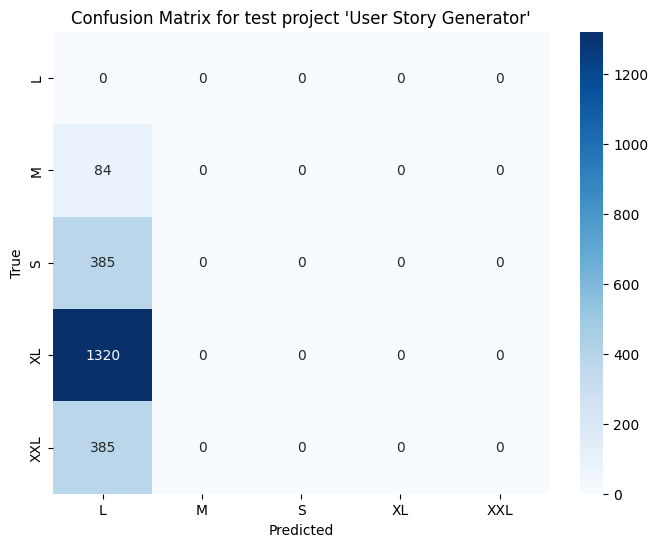

====================Decision Tree====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.00      0.00      0.00       385
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00       385

   micro avg       0.00      0.00      0.00      2174
   macro avg       0.00      0.00      0.00      2174
weighted avg       0.00      0.00      0.00      2174
 samples avg       0.00      0.00      0.00      2174

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

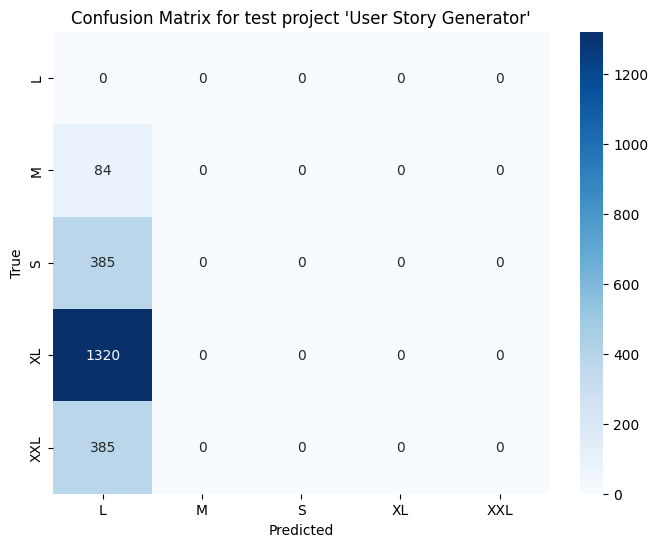

====================Multinomial Naive Bayes====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.00      0.00      0.00       385
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00       385

   micro avg       0.00      0.00      0.00      2174
   macro avg       0.00      0.00      0.00      2174
weighted avg       0.00      0.00      0.00      2174
 samples avg       0.00      0.00      0.00      2174

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

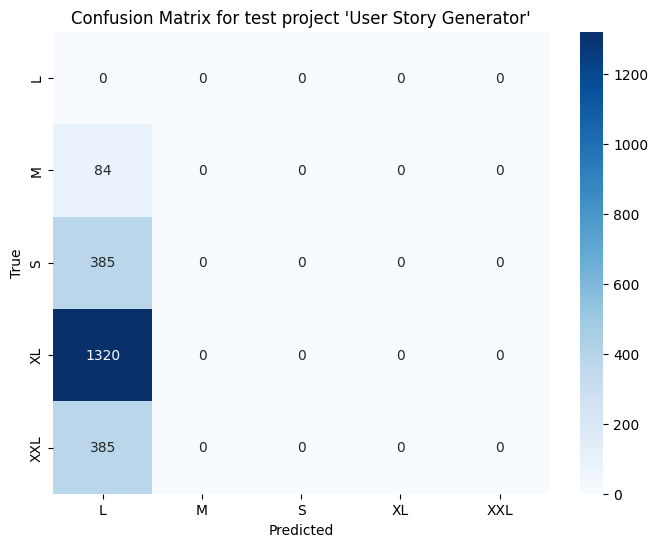

In [14]:
# Model (Numerik) <== Skor Fitur Terbaik
accuracy_list_Adaboost = []
accuracy_list_DecisionTree = []
accuracy_list_MultinomialNB = []
precision_list_Adaboost = []
precision_list_DecisionTree = []
precision_list_MultinomialNB = []
recall_list_Adaboost = []
recall_list_DecisionTree = []
recall_list_MultinomialNB = []
f1_score_list_Adaboost = []
f1_score_list_DecisionTree = []
f1_score_list_MultinomialNB = []
mean_accuracy = []

modelAdaboost = MultiOutputClassifier(AdaBoostClassifier(algorithm="SAMME", random_state=0))
modelDecisionTree = MultiOutputClassifier(DecisionTreeClassifier(random_state=0))
modelMNB = MultiOutputClassifier(MultinomialNB())

# Loop through each unique project name as test data
for test_project_name in unique_projects:
    # Get data for the test project
    test_project_data = df[df['Project Name'] == test_project_name]
    X_test = test_project_data[['number_of_F3', 'number_of_F4', 'number_of_F5']]

    # Get data for training projects (all data except the test project)
    train_projects_data = df[df['Project Name'] != test_project_name]
    X_train = train_projects_data[['number_of_F3', 'number_of_F4', 'number_of_F5']]

    # One hot encode the target variable for training data
    y_train = effort_dense_array[train_projects_data.index]

    # One hot encode the target variable for test data
    y_test = effort_dense_array[test_project_data.index]

    # Adaboost
    modelAdaboost.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelAdaboost.predict(X_test)

    print("====================Adaboost====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_Adaboost.append(accuracy)
    precision_list_Adaboost.append(precision)
    recall_list_Adaboost.append(recall)
    f1_score_list_Adaboost.append(f1)

    # Decision Tree
    modelDecisionTree.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelDecisionTree.predict(X_test)

    print("====================Decision Tree====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_DecisionTree.append(accuracy)
    precision_list_DecisionTree.append(precision)
    recall_list_DecisionTree.append(recall)
    f1_score_list_DecisionTree.append(f1)

    # Decision Tree
    modelMNB.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelMNB.predict(X_test)

    print("====================Multinomial Naive Bayes====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_MultinomialNB.append(accuracy)
    precision_list_MultinomialNB.append(precision)
    recall_list_MultinomialNB.append(recall)
    f1_score_list_MultinomialNB.append(f1)

====================Adaboost====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00      3850
           M       0.00      0.00      0.00      3864
           S       0.09      0.39      0.14       990
          XL       0.00      0.00      0.00      1320
         XXL       0.14      1.00      0.24      1155

   micro avg       0.12      0.14      0.13     11179
   macro avg       0.05      0.28      0.08     11179
weighted avg       0.02      0.14      0.04     11179
 samples avg       0.12      0.14      0.12     11179



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Precision: 0.022207838374318986     Recall: 0.13775829680651222      Accuracy: 0.09347884426156186      F1 Score: 0.03799526110451561

Confusion matrix for test project 'Akobesi':


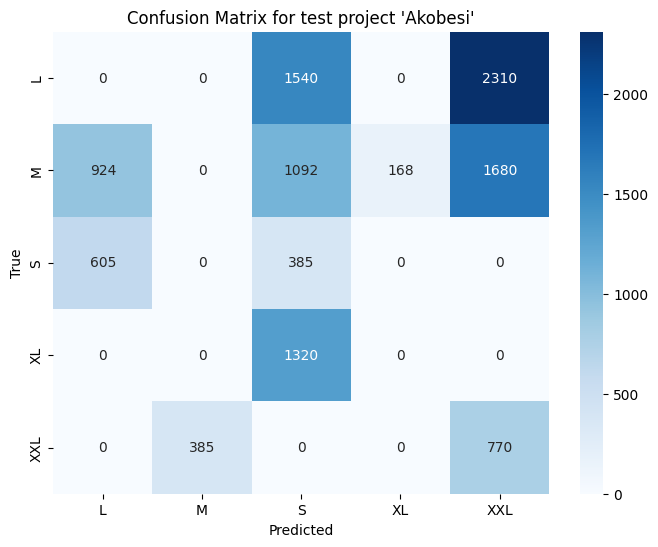

====================Decision Tree====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00      3850
           M       0.16      0.24      0.19      3864
           S       0.13      1.00      0.23       990
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00      1155

   micro avg       0.13      0.17      0.15     11179
   macro avg       0.06      0.25      0.08     11179
weighted avg       0.07      0.17      0.09     11179
 samples avg       0.13      0.17      0.15     11179



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Precision: 0.06693155361532925     Recall: 0.17121388317380803      Accuracy: 0.09866714375167725      F1 Score: 0.08673526911076139

Confusion matrix for test project 'Akobesi':


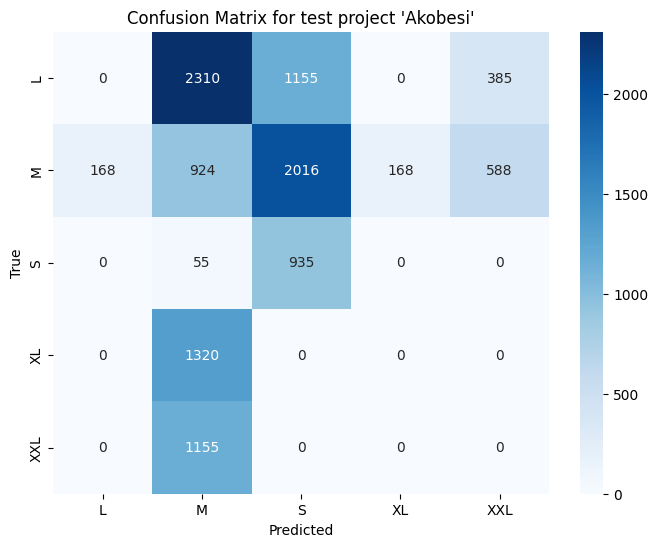

====================Multinomial Naive Bayes====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00      3850
           M       0.03      0.02      0.03      3864
           S       0.03      0.22      0.05       990
          XL       0.00      0.00      0.00      1320
         XXL       0.27      1.00      0.43      1155

   micro avg       0.09      0.13      0.11     11179
   macro avg       0.07      0.25      0.10     11179
weighted avg       0.04      0.13      0.06     11179
 samples avg       0.06      0.13      0.08     11179



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Precision: 0.040864304894755225     Recall: 0.1305125682082476      Accuracy: 0.009839878343322301      F1 Score: 0.057123690432675484

Confusion matrix for test project 'Akobesi':


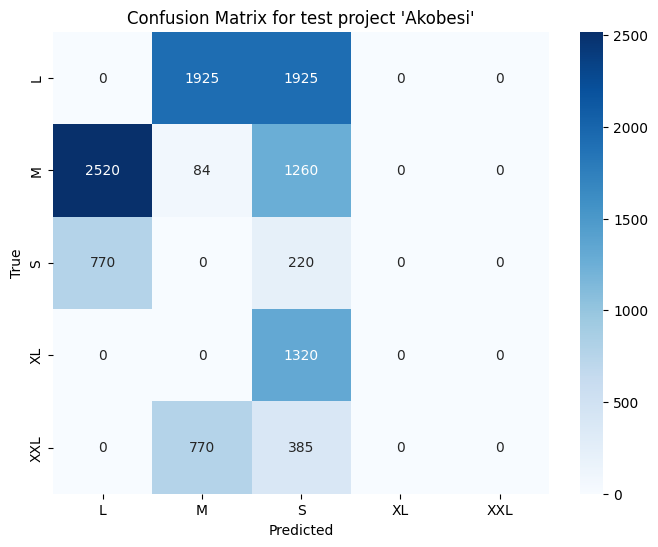

====================Adaboost====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       1.00      0.50      0.67       330
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       1.00      0.21      0.34       799
   macro avg       0.20      0.10      0.13       799
weighted avg       0.41      0.21      0.28       799
 samples avg       0.21      0.21      0.21       799

Precision: 0.4130162703379224     Recall: 0.2065081351689612      Accuracy: 0.2065081351689612      F1 Score: 0.2753441802252816

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

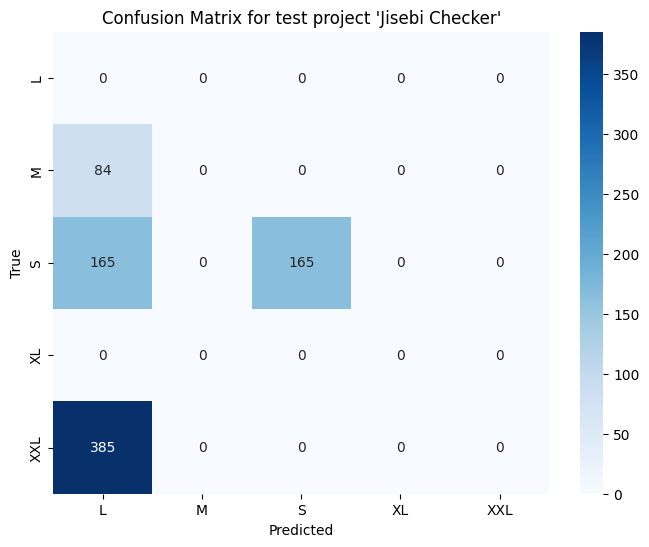

====================Decision Tree====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       1.00      0.83      0.91       330
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.38      0.34      0.36       799
   macro avg       0.20      0.17      0.18       799
weighted avg       0.41      0.34      0.38       799
 samples avg       0.34      0.34      0.34       799

Precision: 0.4130162703379224     Recall: 0.344180225281602      Accuracy: 0.344180225281602      F1 Score: 0.37546933667083854

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

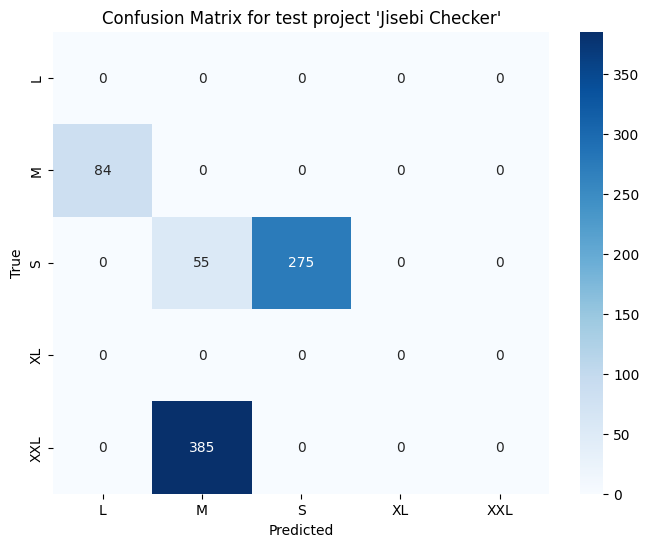

====================Multinomial Naive Bayes====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       1.00      0.50      0.67       330
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.50      0.21      0.29       799
   macro avg       0.20      0.10      0.13       799
weighted avg       0.41      0.21      0.28       799
 samples avg       0.10      0.21      0.14       799

Precision: 0.4130162703379224     Recall: 0.2065081351689612      Accuracy: 0.0      F1 Score: 0.2753441802252816

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

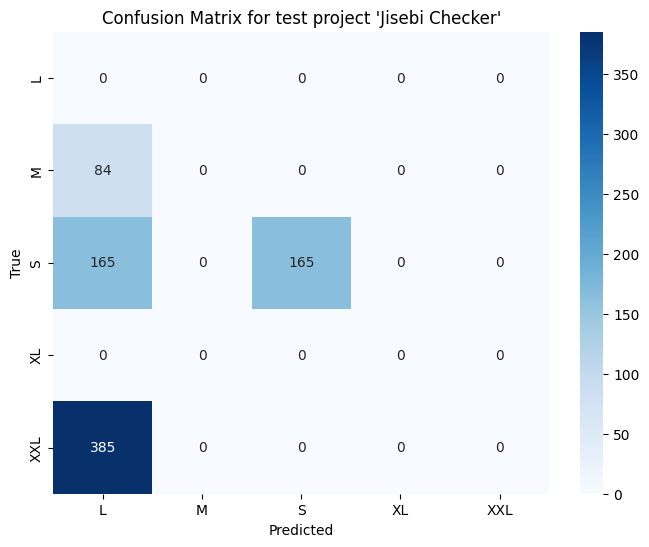

====================Adaboost====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.33      0.50       495
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.50      0.19      0.27       880
   macro avg       0.20      0.07      0.10       880
weighted avg       0.56      0.19      0.28       880
 samples avg       0.16      0.19      0.17       880

Precision: 0.5625     Recall: 0.1875      Accuracy: 0.125      F1 Score: 0.28125

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

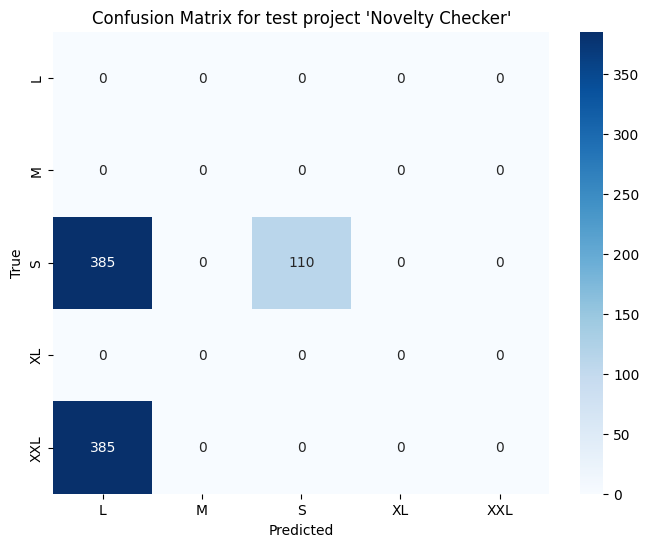

====================Decision Tree====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.67      0.80       495
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.35      0.38      0.36       880
   macro avg       0.20      0.13      0.16       880
weighted avg       0.56      0.38      0.45       880
 samples avg       0.34      0.38      0.35       880

Precision: 0.5625     Recall: 0.375      Accuracy: 0.3125      F1 Score: 0.45

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

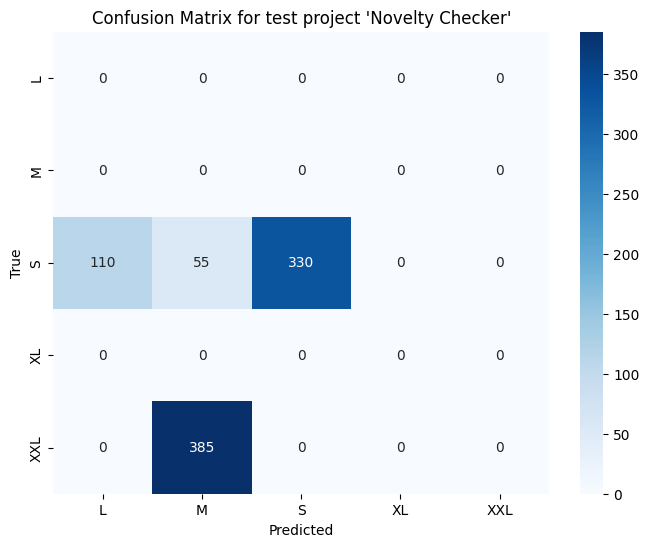

====================Multinomial Naive Bayes====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.56      0.71       495
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       385

   micro avg       0.50      0.31      0.38       880
   macro avg       0.20      0.11      0.14       880
weighted avg       0.56      0.31      0.40       880
 samples avg       0.16      0.31      0.21       880

Precision: 0.5625     Recall: 0.3125      Accuracy: 0.0      F1 Score: 0.40178571428571425

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

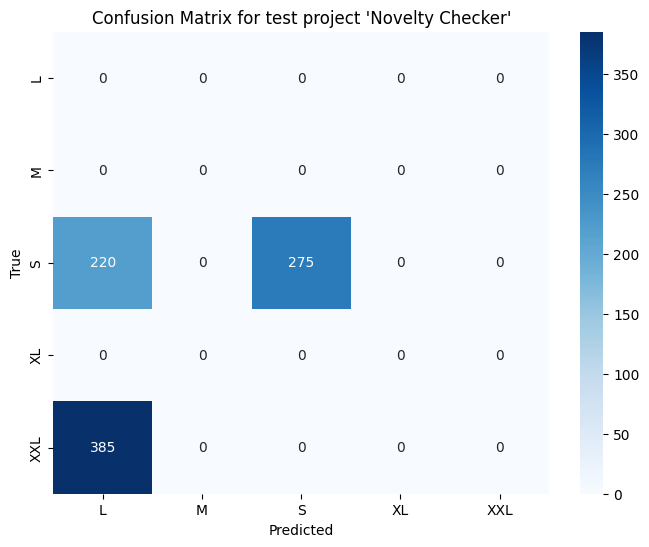

====================Adaboost====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.00      0.00      0.00        84
           S       0.46      0.60      0.52       550
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00       385

   micro avg       0.40      0.16      0.23      2064
   macro avg       0.09      0.12      0.10      2064
weighted avg       0.12      0.16      0.14      2064
 samples avg       0.16      0.16      0.16      2064

Precision: 0.12298747763864044     Recall: 0.15988372093023256      Accuracy: 0.15988372093023256      F1 Score: 0.1390293225480283

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

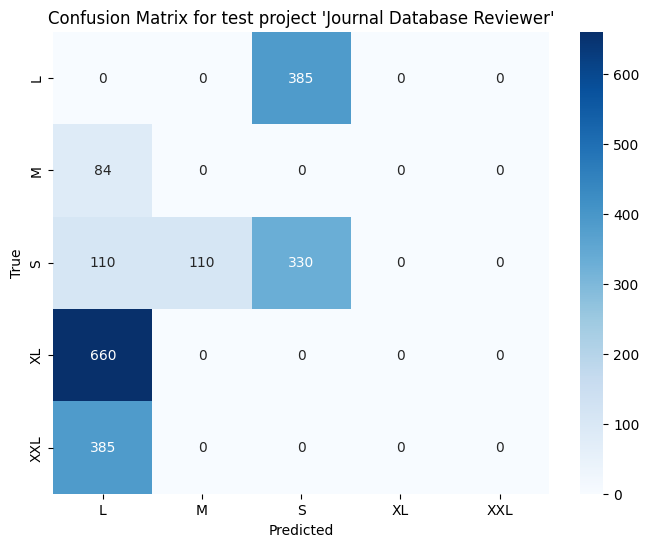

====================Decision Tree====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.00      0.00      0.00        84
           S       0.48      0.80      0.60       550
          XL       0.00      0.00      0.00       660
         XXL       1.00      1.00      1.00       385

   micro avg       0.57      0.40      0.47      2064
   macro avg       0.30      0.36      0.32      2064
weighted avg       0.32      0.40      0.35      2064
 samples avg       0.39      0.40      0.39      2064

Precision: 0.3155167745456716     Recall: 0.3997093023255814      Accuracy: 0.37306201550387597      F1 Score: 0.3472548761762065

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

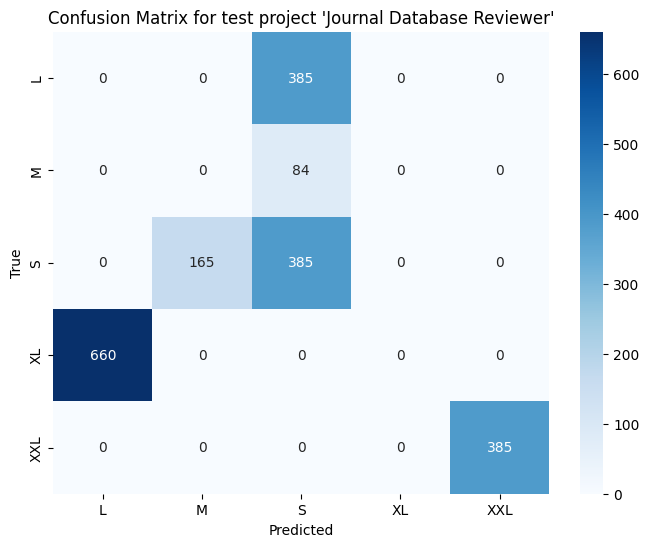

====================Multinomial Naive Bayes====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.00      0.00      0.00        84
           S       0.09      0.20      0.12       550
          XL       0.83      1.00      0.90       660
         XXL       0.00      0.00      0.00       385

   micro avg       0.35      0.37      0.36      2064
   macro avg       0.18      0.24      0.21      2064
weighted avg       0.29      0.37      0.32      2064
 samples avg       0.20      0.37      0.26      2064



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Precision: 0.28779611347777706     Recall: 0.37306201550387597      Accuracy: 0.026647286821705425      F1 Score: 0.32207212526974927

Confusion matrix for test project 'Journal Database Reviewer':


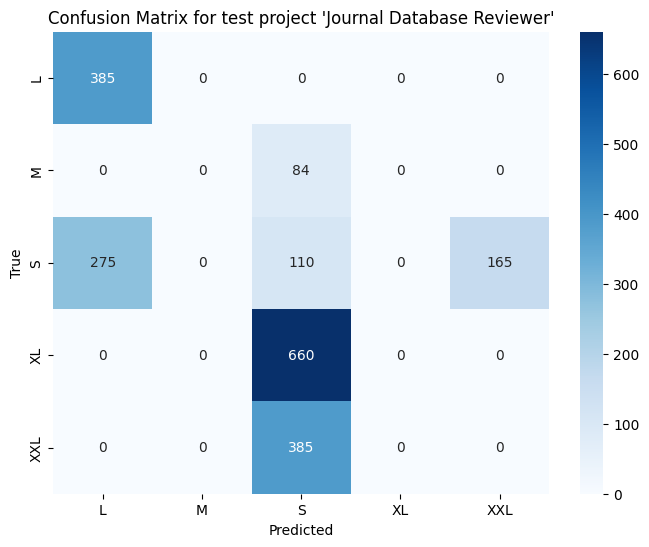

====================Adaboost====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00       168
           S       1.00      0.67      0.80       165
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.57      0.11      0.19       993
   macro avg       0.20      0.13      0.16       993
weighted avg       0.17      0.11      0.13       993
 samples avg       0.11      0.11      0.11       993

Precision: 0.1661631419939577     Recall: 0.1107754279959718      Accuracy: 0.1107754279959718      F1 Score: 0.13293051359516617

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

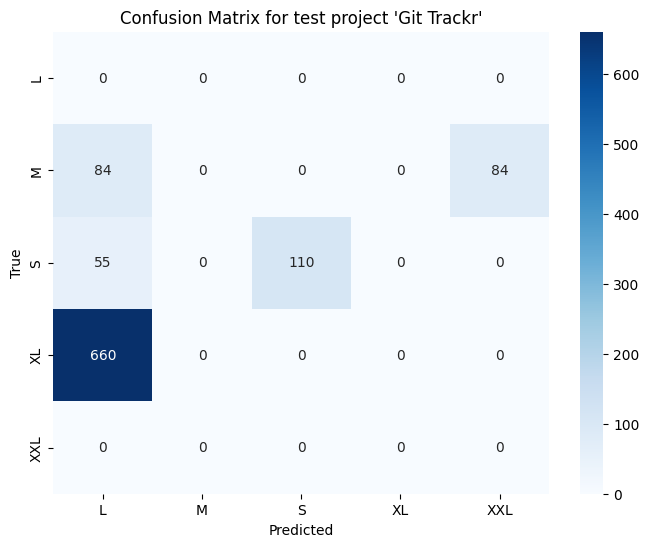

====================Decision Tree====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.11      0.50      0.17       168
           S       0.66      1.00      0.80       165
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.21      0.25      0.23       993
   macro avg       0.15      0.30      0.19       993
weighted avg       0.13      0.25      0.16       993
 samples avg       0.17      0.25      0.19       993

Precision: 0.12789468982335006     Recall: 0.25075528700906347      Accuracy: 0.1107754279959718      F1 Score: 0.16184180862639347

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

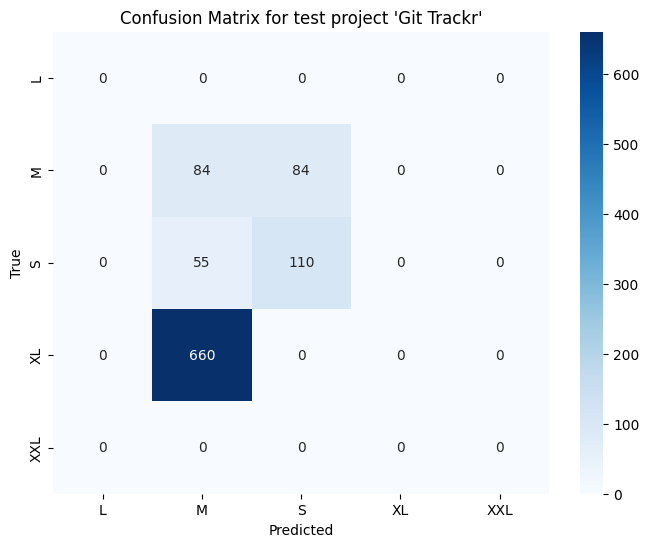

====================Multinomial Naive Bayes====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.11      0.50      0.18       168
           S       0.00      0.00      0.00       165
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.06      0.08      0.07       993
   macro avg       0.02      0.10      0.04       993
weighted avg       0.02      0.08      0.03       993
 samples avg       0.04      0.08      0.06       993



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.019101452100185167     Recall: 0.08459214501510574      Accuracy: 0.0      F1 Score: 0.031165527110828428

Confusion matrix for test project 'Git Trackr':


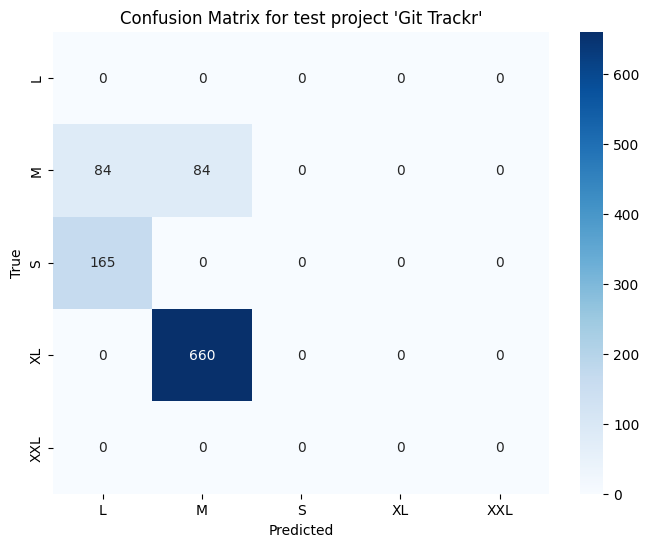

====================Adaboost====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.50      0.67       220
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.14      0.12      0.13       880
   macro avg       0.20      0.10      0.13       880
weighted avg       0.25      0.12      0.17       880
 samples avg       0.12      0.12      0.12       880

Precision: 0.25     Recall: 0.125      Accuracy: 0.125      F1 Score: 0.16666666666666666

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

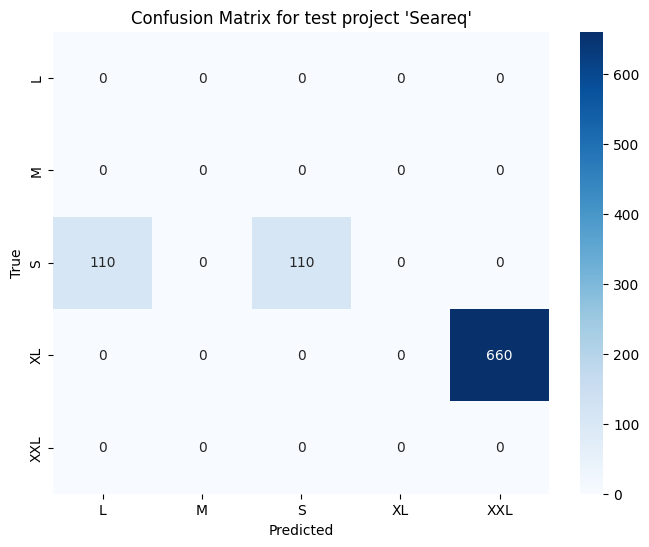

====================Decision Tree====================

Classification report for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.75      0.86       220
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       1.00      0.19      0.32       880
   macro avg       0.20      0.15      0.17       880
weighted avg       0.25      0.19      0.21       880
 samples avg       0.19      0.19      0.19       880



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", 

Precision: 0.25     Recall: 0.1875      Accuracy: 0.1875      F1 Score: 0.21428571428571427

Confusion matrix for test project 'Seareq':


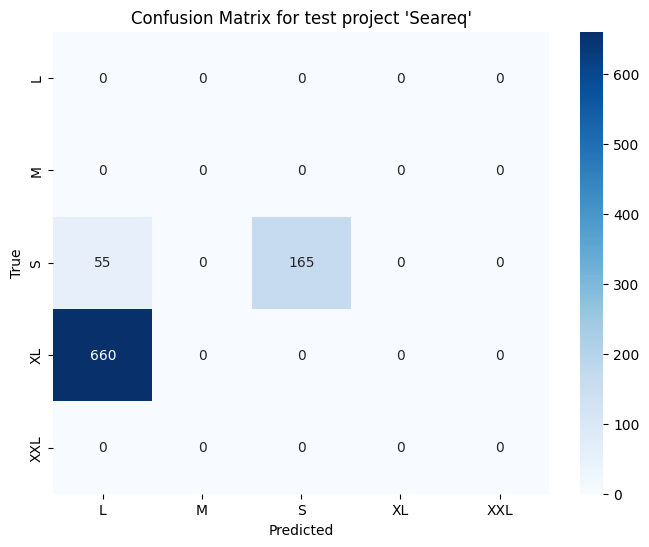

====================Multinomial Naive Bayes====================

Classification report for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.00      0.00      0.00       220
          XL       0.00      0.00      0.00       660
         XXL       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00       880
   macro avg       0.00      0.00      0.00       880
weighted avg       0.00      0.00      0.00       880
 samples avg       0.00      0.00      0.00       880

Precision: 0.0     Recall: 0.0      Accuracy: 0.0      F1 Score: 0.0

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", 

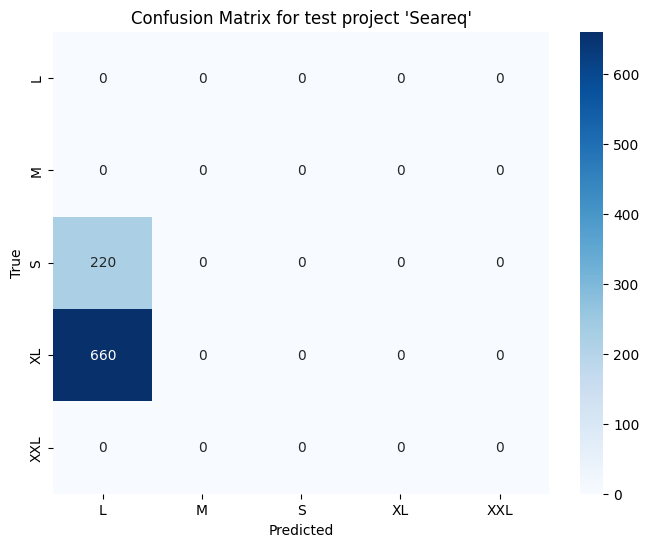

====================Adaboost====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.00      0.00      0.00       168
           S       0.51      0.60      0.55       825
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.49      0.36      0.41      1378
   macro avg       0.10      0.12      0.11      1378
weighted avg       0.31      0.36      0.33      1378
 samples avg       0.36      0.36      0.36      1378

Precision: 0.3074205505603767     Recall: 0.35921625544267055      Accuracy: 0.35921625544267055      F1 Score: 0.331306216590501

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

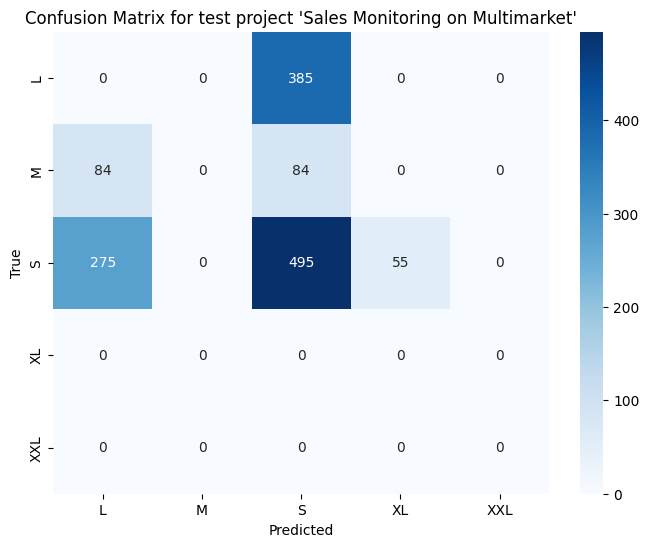

====================Decision Tree====================

Classification report for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.34      0.50      0.40       168
           S       0.58      0.80      0.68       825
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.52      0.54      0.53      1378
   macro avg       0.18      0.26      0.22      1378
weighted avg       0.39      0.54      0.45      1378
 samples avg       0.52      0.54      0.53      1378

Precision: 0.39111749415383523     Recall: 0.5399129172714079      Accuracy: 0.5      F1 Score: 0.4535571659139525

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", 

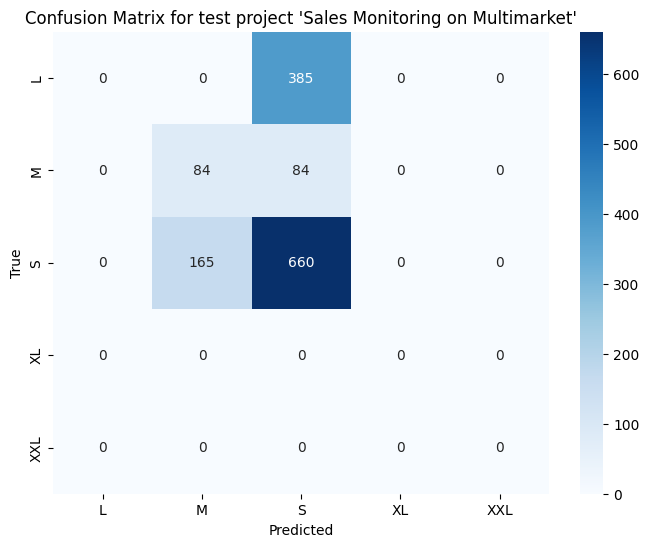

====================Multinomial Naive Bayes====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00       385
           M       0.00      0.00      0.00       168
           S       0.57      0.13      0.22       825
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.22      0.08      0.12      1378
   macro avg       0.11      0.03      0.04      1378
weighted avg       0.34      0.08      0.13      1378
 samples avg       0.04      0.08      0.05      1378



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.3394655334939326     Recall: 0.07982583454281568      Accuracy: 0.0      F1 Score: 0.1292567487690342

Confusion matrix for test project 'Sales Monitoring on Multimarket':


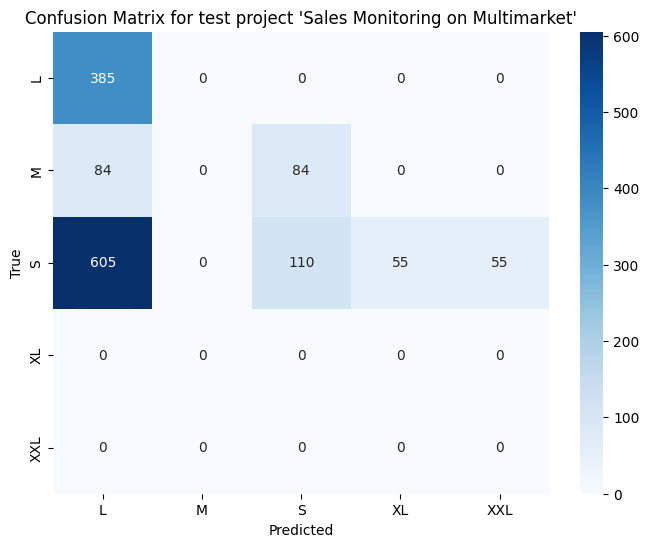

====================Adaboost====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       1.00      0.60      0.75       275
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       770

   micro avg       1.00      0.15      0.26      1129
   macro avg       0.20      0.12      0.15      1129
weighted avg       0.24      0.15      0.18      1129
 samples avg       0.15      0.15      0.15      1129

Precision: 0.24357838795394154     Recall: 0.14614703277236493      Accuracy: 0.14614703277236493      F1 Score: 0.18268379096545614

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

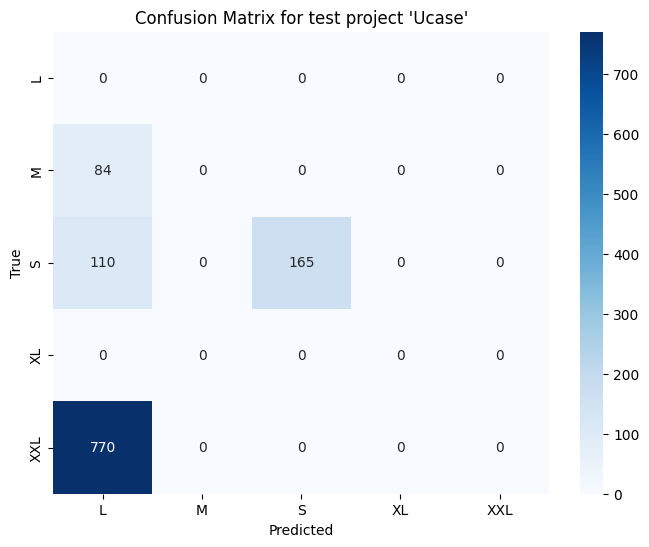

====================Decision Tree====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.18      1.00      0.30        84
           S       1.00      1.00      1.00       275
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       770

   micro avg       0.48      0.32      0.38      1129
   macro avg       0.24      0.40      0.26      1129
weighted avg       0.26      0.32      0.27      1129
 samples avg       0.32      0.32      0.32      1129

Precision: 0.25690414182409477     Recall: 0.3179805137289637      Accuracy: 0.3179805137289637      F1 Score: 0.2661815654045812

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

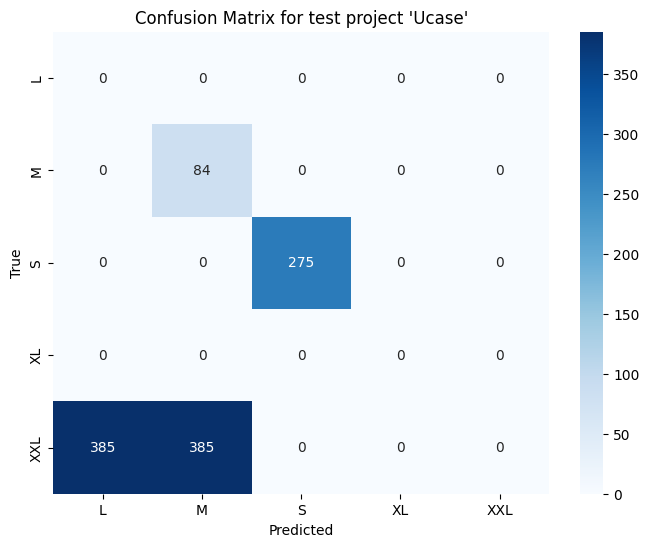

====================Multinomial Naive Bayes====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.19      0.40      0.26       275
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00       770

   micro avg       0.09      0.10      0.10      1129
   macro avg       0.04      0.08      0.05      1129
weighted avg       0.05      0.10      0.06      1129
 samples avg       0.05      0.10      0.06      1129

Precision: 0.046275686830627924     Recall: 0.09743135518157661      Accuracy: 0.0      F1 Score: 0.06274853085464535

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

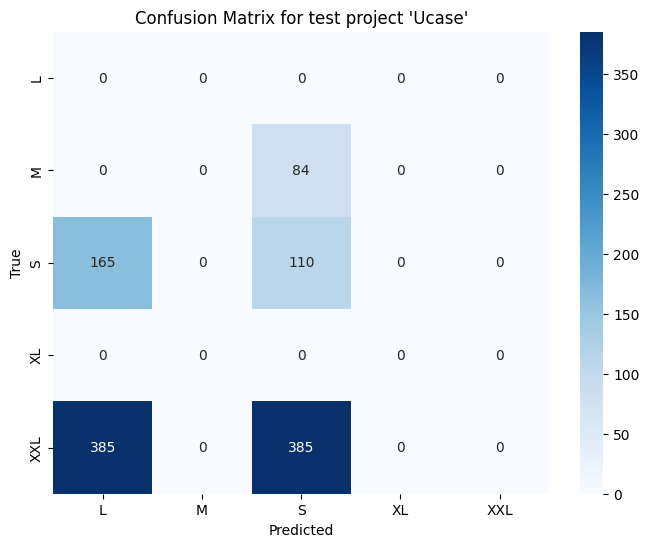

====================Adaboost====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       1.00      0.57      0.73       385
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00      1155

   micro avg       0.22      0.14      0.17      1624
   macro avg       0.20      0.11      0.15      1624
weighted avg       0.24      0.14      0.17      1624
 samples avg       0.14      0.14      0.14      1624

Precision: 0.23706896551724138     Recall: 0.1354679802955665      Accuracy: 0.1354679802955665      F1 Score: 0.1724137931034483

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

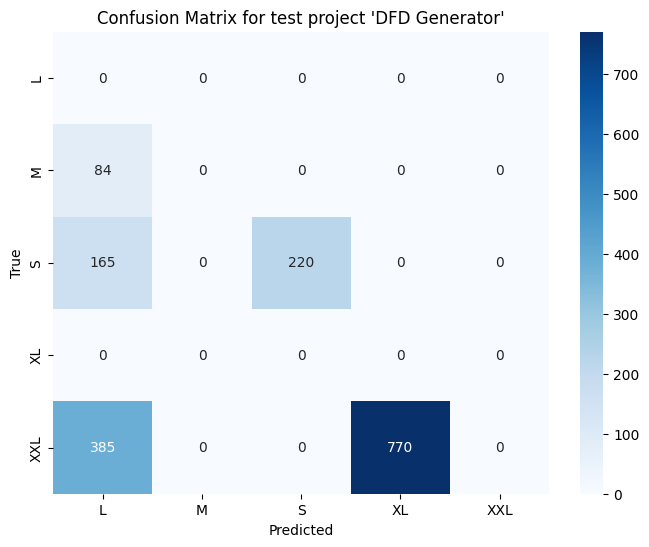

====================Decision Tree====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.07      1.00      0.13        84
           S       1.00      0.86      0.92       385
          XL       0.00      0.00      0.00         0
         XXL       1.00      0.33      0.50      1155

   micro avg       0.40      0.49      0.44      1624
   macro avg       0.41      0.44      0.31      1624
weighted avg       0.95      0.49      0.58      1624
 samples avg       0.36      0.49      0.40      1624



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.9517825832846288     Recall: 0.4919950738916256      Accuracy: 0.2210591133004926      F1 Score: 0.5810044840217253

Confusion matrix for test project 'DFD Generator':


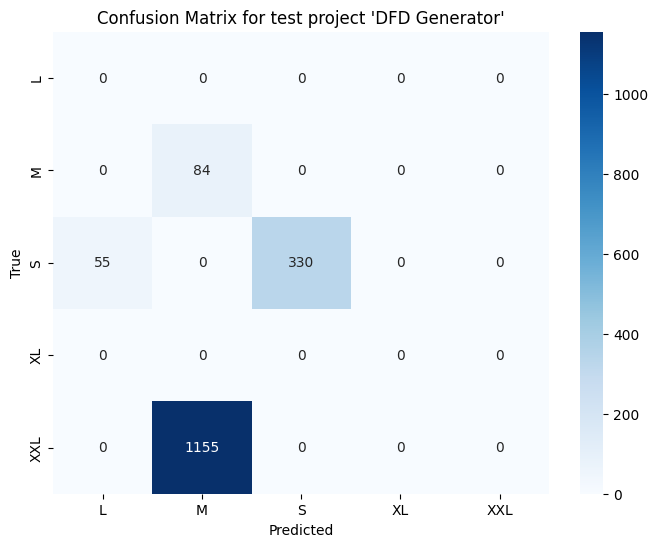

====================Multinomial Naive Bayes====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.10      1.00      0.18        84
           S       0.08      0.29      0.13       385
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00      1155

   micro avg       0.05      0.12      0.07      1624
   macro avg       0.04      0.26      0.06      1624
weighted avg       0.02      0.12      0.04      1624
 samples avg       0.05      0.12      0.07      1624



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.024418669944153933     Recall: 0.11945812807881774      Accuracy: 0.0      F1 Score: 0.039341978806599384

Confusion matrix for test project 'DFD Generator':


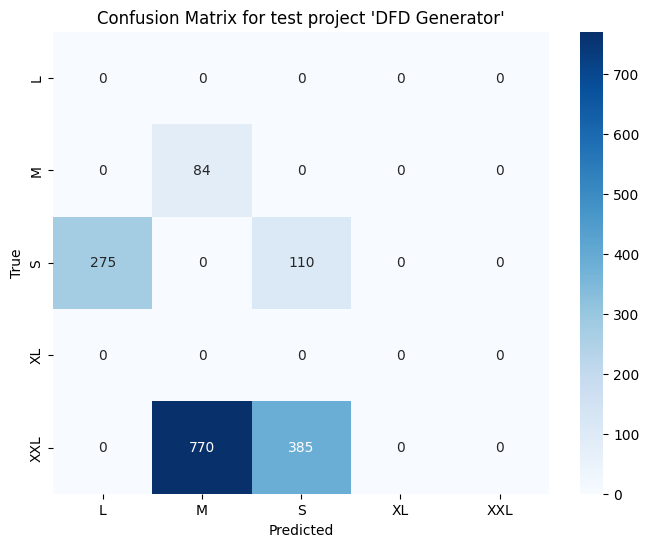

====================Adaboost====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.20      0.43      0.27       385
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00       385

   micro avg       0.14      0.08      0.10      2174
   macro avg       0.04      0.09      0.05      2174
weighted avg       0.04      0.08      0.05      2174
 samples avg       0.08      0.08      0.08      2174

Precision: 0.03541858325666973     Recall: 0.07589696412143514      Accuracy: 0.07589696412143514      F1 Score: 0.048298068077276914

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

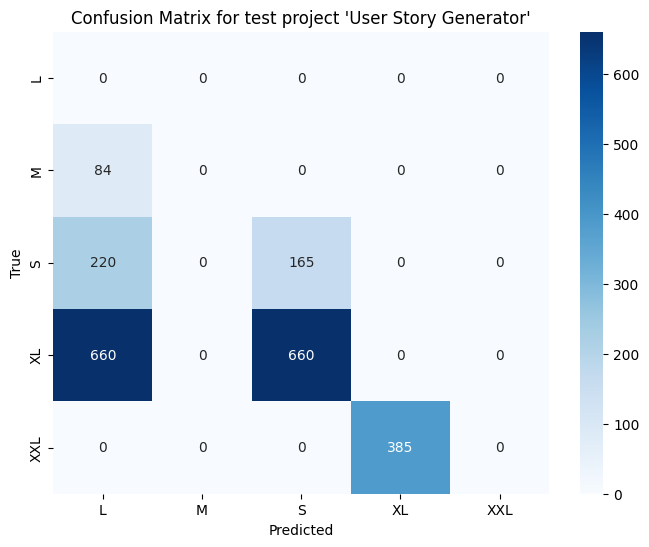

====================Decision Tree====================

Classification report for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.60      1.00      0.75        84
           S       0.29      0.71      0.42       385
          XL       0.00      0.00      0.00      1320
         XXL       0.88      1.00      0.93       385

   micro avg       0.49      0.34      0.40      2174
   macro avg       0.35      0.54      0.42      2174
weighted avg       0.23      0.34      0.27      2174
 samples avg       0.34      0.34      0.34      2174



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", 

Precision: 0.23039231096858537     Recall: 0.3422263109475621      Accuracy: 0.3422263109475621      F1 Score: 0.2681842277878392

Confusion matrix for test project 'User Story Generator':


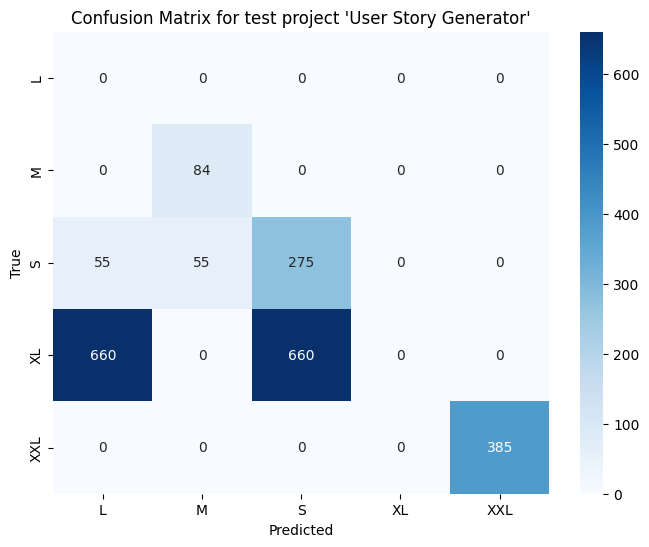

====================Multinomial Naive Bayes====================

Classification report for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00        84
           S       0.66      0.43      0.52       385
          XL       0.00      0.00      0.00      1320
         XXL       0.00      0.00      0.00       385

   micro avg       0.33      0.08      0.12      2174
   macro avg       0.13      0.09      0.10      2174
weighted avg       0.12      0.08      0.09      2174
 samples avg       0.04      0.08      0.05      2174

Precision: 0.11735072765764068     Recall: 0.07589696412143514      Accuracy: 0.0      F1 Score: 0.09217770090458212

Confusion matrix for test project 'User Story Generator':


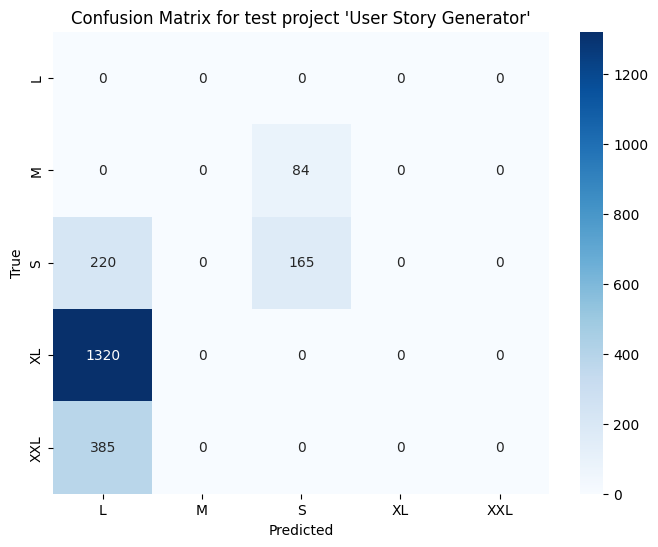

In [15]:
# Model (Numerik) <== 3 Skor Fitur Terbaik
accuracy_list_Adaboost = []
accuracy_list_DecisionTree = []
accuracy_list_MultinomialNB = []
precision_list_Adaboost = []
precision_list_DecisionTree = []
precision_list_MultinomialNB = []
recall_list_Adaboost = []
recall_list_DecisionTree = []
recall_list_MultinomialNB = []
f1_score_list_Adaboost = []
f1_score_list_DecisionTree = []
f1_score_list_MultinomialNB = []
mean_accuracy = []

modelAdaboost = MultiOutputClassifier(AdaBoostClassifier(algorithm="SAMME", random_state=0))
modelDecisionTree = MultiOutputClassifier(DecisionTreeClassifier(random_state=0))
modelMNB = MultiOutputClassifier(MultinomialNB())

# Loop through each unique project name as test data
for test_project_name in unique_projects:
    # Get data for the test project
    test_project_data = df[df['Project Name'] == test_project_name]
    X_test = test_project_data[['number_word', 'number_of_S3', 'number_of_F3', 'number_of_F4', 'number_of_A3', 'number_of_A4', 'number_of_A5']]

    # Get data for training projects (all data except the test project)
    train_projects_data = df[df['Project Name'] != test_project_name]
    X_train = train_projects_data[['number_word', 'number_of_S3', 'number_of_F3', 'number_of_F4', 'number_of_A3', 'number_of_A4', 'number_of_A5']]

    # One hot encode the target variable for training data
    y_train = effort_dense_array[train_projects_data.index]

    # One hot encode the target variable for test data
    y_test = effort_dense_array[test_project_data.index]

    # Adaboost
    modelAdaboost.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelAdaboost.predict(X_test)

    print("====================Adaboost====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_Adaboost.append(accuracy)
    precision_list_Adaboost.append(precision)
    recall_list_Adaboost.append(recall)
    f1_score_list_Adaboost.append(f1)

    # Decision Tree
    modelDecisionTree.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelDecisionTree.predict(X_test)

    print("====================Decision Tree====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_DecisionTree.append(accuracy)
    precision_list_DecisionTree.append(precision)
    recall_list_DecisionTree.append(recall)
    f1_score_list_DecisionTree.append(f1)

    # Decision Tree
    modelMNB.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelMNB.predict(X_test)

    print("====================Multinomial Naive Bayes====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_MultinomialNB.append(accuracy)
    precision_list_MultinomialNB.append(precision)
    recall_list_MultinomialNB.append(recall)
    f1_score_list_MultinomialNB.append(f1)